# Import packages

In [45]:
current_path

PosixPath('/Users/dusiyi/Documents/Multifirefly-Project')

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)

from data_wrangling import specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils
from non_behavioral_analysis.neural_data_analysis.model_neural_data.cca_methods import cca_class, cca_plotting

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Retrieve data

In [2]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"

In [3]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

In [3]:
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
normalize = False
eliminate_outliers = False
use_curvature_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
truncate_curv_of_traj_by_time_of_capture = True

pn = planning_neural_class.PlanningAndNeural(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning()


# pn.streamline_organizing_info(ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
#                                curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
#                                use_curvature_to_ff_center=use_curvature_to_ff_center,  eliminate_outliers=eliminate_outliers)

# pn.retrieve_neural_data()
# pn.get_all_planning_info()

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 768 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 768 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving stop_0_1_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0330/diff_in_curv_df/norm_opt_arc/test/stop_0_1_window_-50cm_0cm succeeded
Retrieving Bruno_stop_0_1 from all_monkey_data/planning/monkey_Bruno/data_0330/heading_info_df/norm_opt_arc/test/Bruno_stop_0_1 succeeded
Window width changed from 0.25 to 0.26 to make it odd
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0330/binned_spikes_df.csv


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/neural_vs_behavioral/prep_monkey_data.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  monkey_info_in_bins = monkey_info_in_bins.bfill(


In [6]:
print(pn.both_ff_across_time_df.shape)
pn.both_ff_across_time_df.head(5)

(4967, 15)


,point_index,nxt_ff_angle,nxt_ff_distance,nxt_arc_curv,nxt_opt_arc_curv,nxt_opt_arc_dheading,time_rel_to_stop,traj_curv,cur_ff_angle,cur_ff_distance,cur_arc_curv,cur_opt_arc_curv,cur_opt_arc_dheading,stop_point_index,bin
0,2390,-0.05136,294.46944,-0.00035,-0.00069,-0.20359,-1.87570,-0.00623,-0.12777,212.48021,-0.00120,-0.00186,-0.39150,2503,158
1,2405,0.15190,249.19730,0.00121,0.00074,0.18436,-1.62672,-0.00175,0.06022,167.11417,0.00072,0.00000,0.00017,2503,159
2,2420,0.14997,200.51246,0.00149,0.00223,0.44246,-1.37771,0.00284,0.04635,117.84479,0.00079,0.00284,0.32780,2503,160
3,2435,0.05814,170.92792,0.00068,0.00171,0.28839,-1.12870,0.00356,-0.06492,88.10510,-0.00147,-0.00000,-0.00009,2503,161
4,2450,0.03831,170.37712,0.00045,0.00149,0.25017,-0.87972,0.00356,-0.08539,87.55547,-0.00195,-0.00000,-0.00009,2503,162


In [ ]:
# original_len = len(pn.all_planning_info)
# pn.y_var = pn.all_planning_info.dropna().drop(columns={'stop_point_index', 'point_index'})
# print(f"{round(1 - len(pn.y_var) / len(pn.all_planning_info), 2)}% of rows are dropped in all_planning_info due to having missing values")
# pn.x_var = pn.binned_spikes_df[pn.binned_spikes_df['bin'].isin(pn.y_var['bin'].values)].drop(columns=['bin'])

0.44% of rows are dropped in all_planning_info due to having missing values


In [ ]:
# print('binned_spikes_df.shape:', pn.binned_spikes_df.shape)
# print('pn.x_var.shape:', pn.x_var.shape)
# print('pn.y_var.shape:', pn.y_var.shape)

binned_spikes_df.shape: (179950, 17)
pn.x_var.shape: (2780, 16)
pn.y_var.shape: (2780, 13)


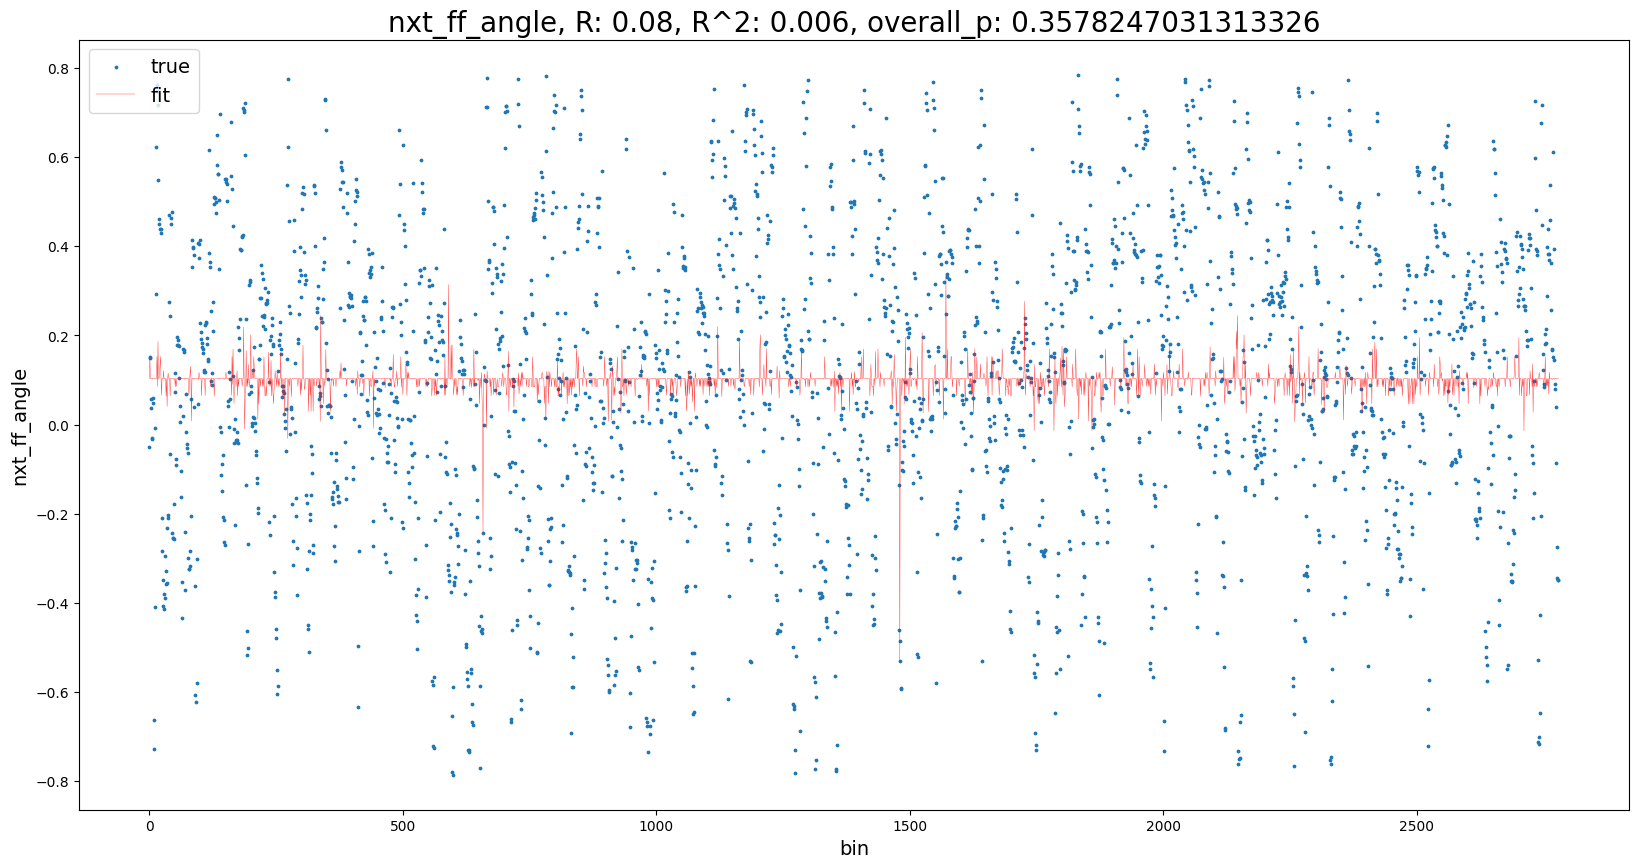

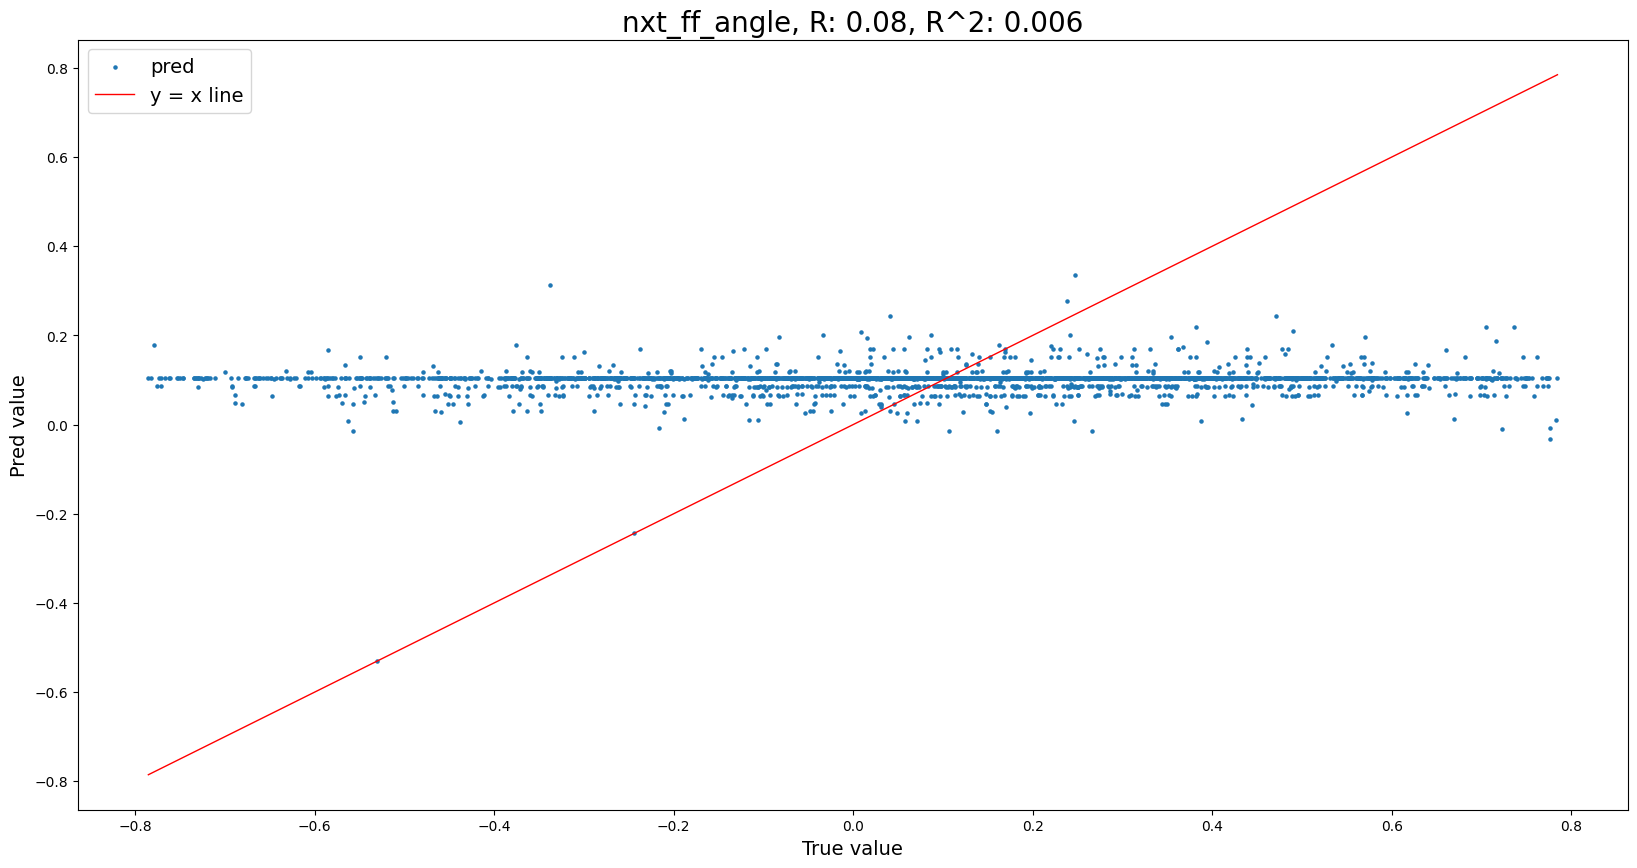

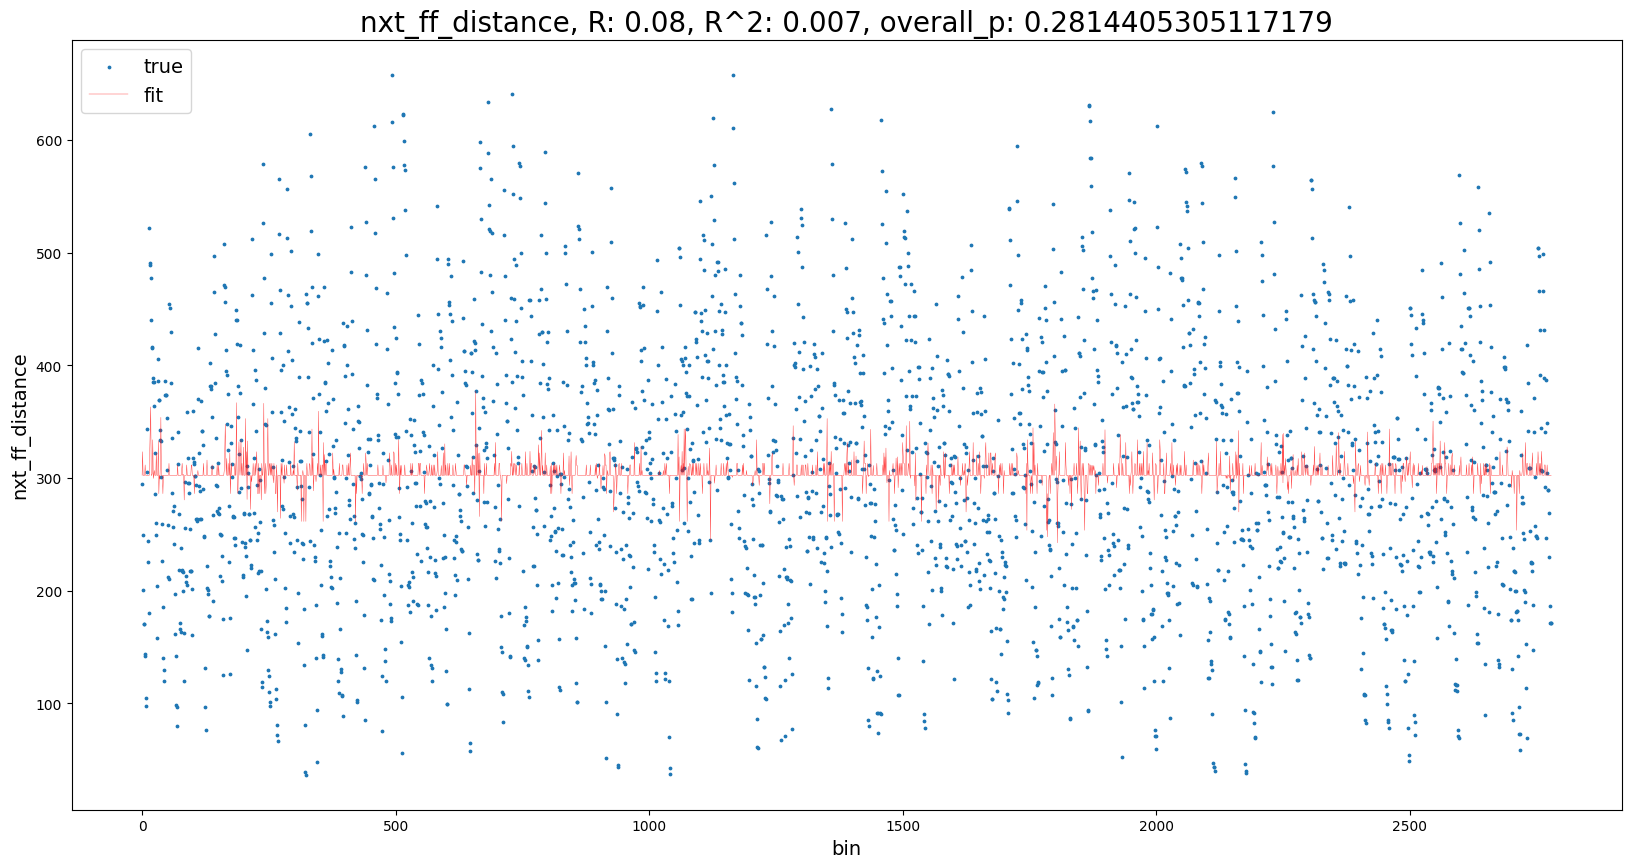

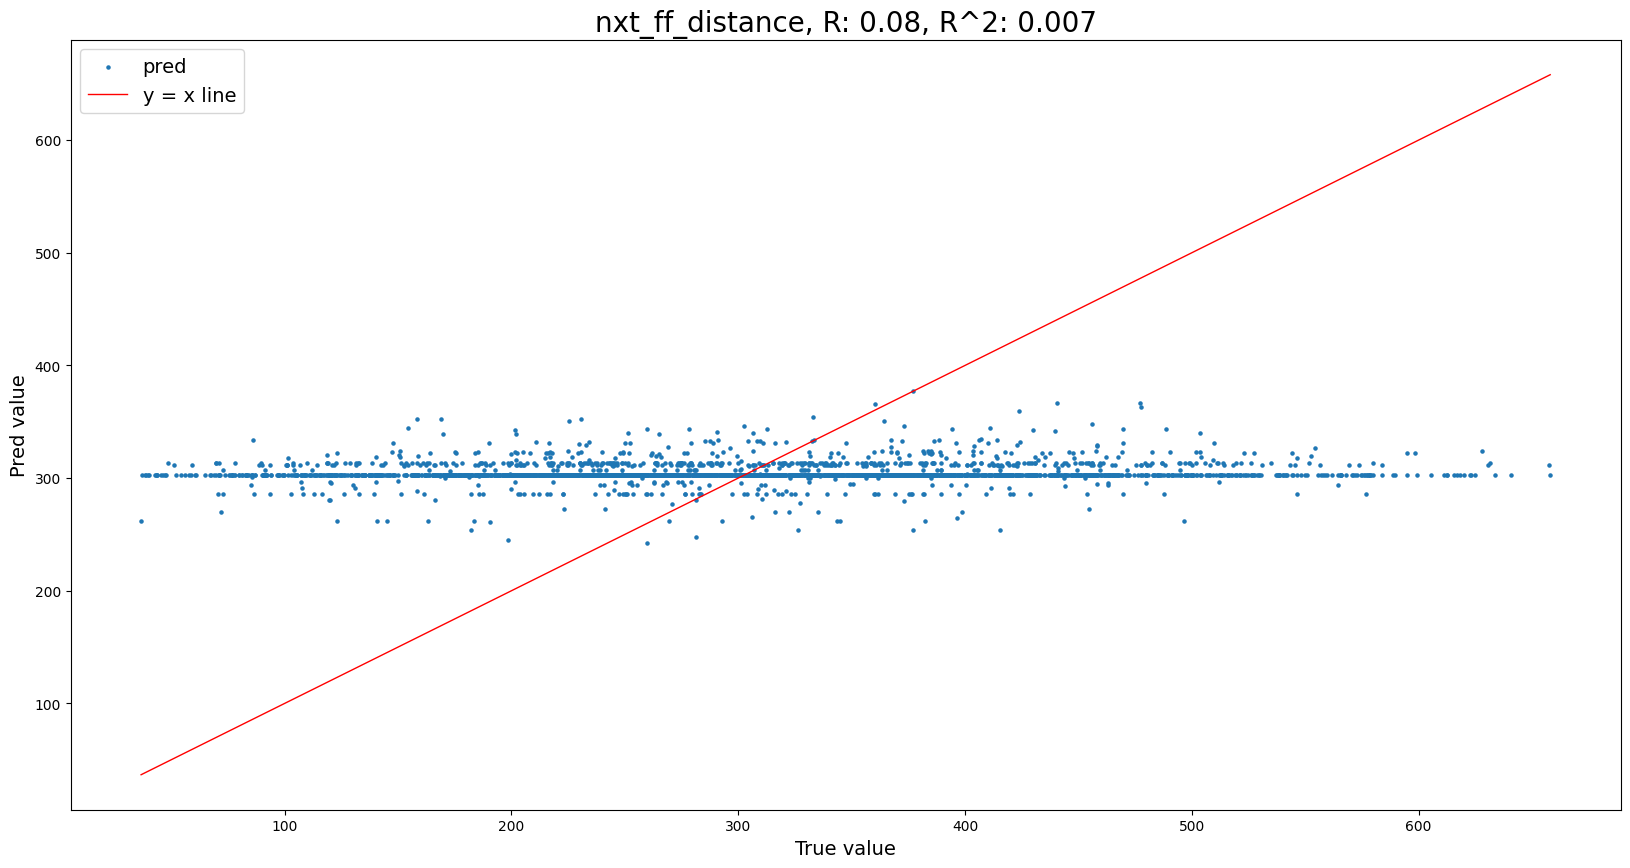

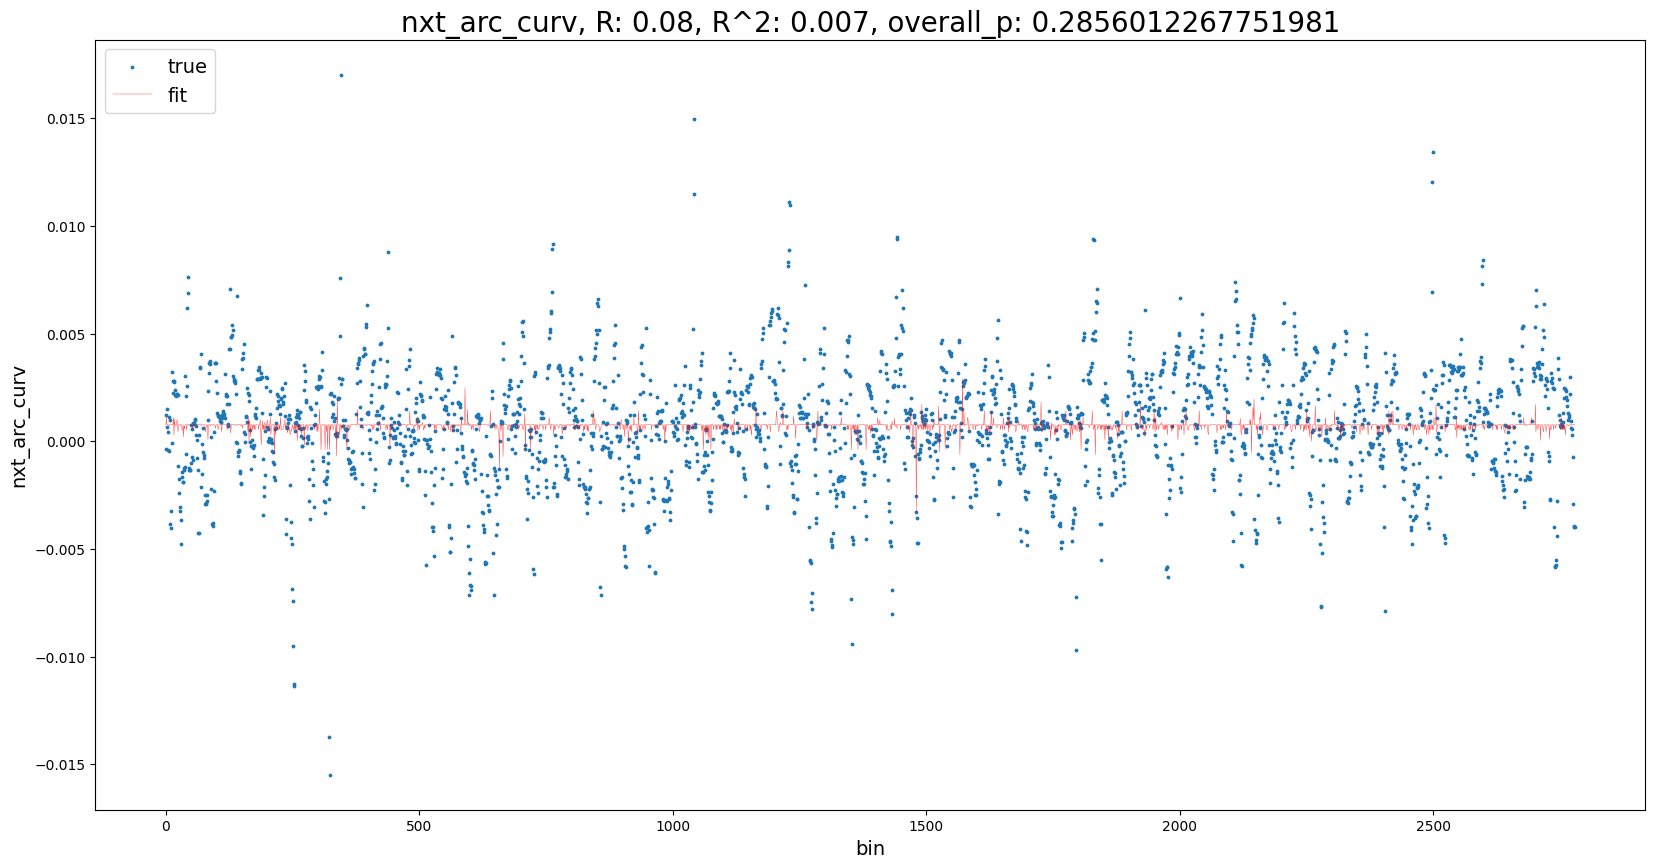

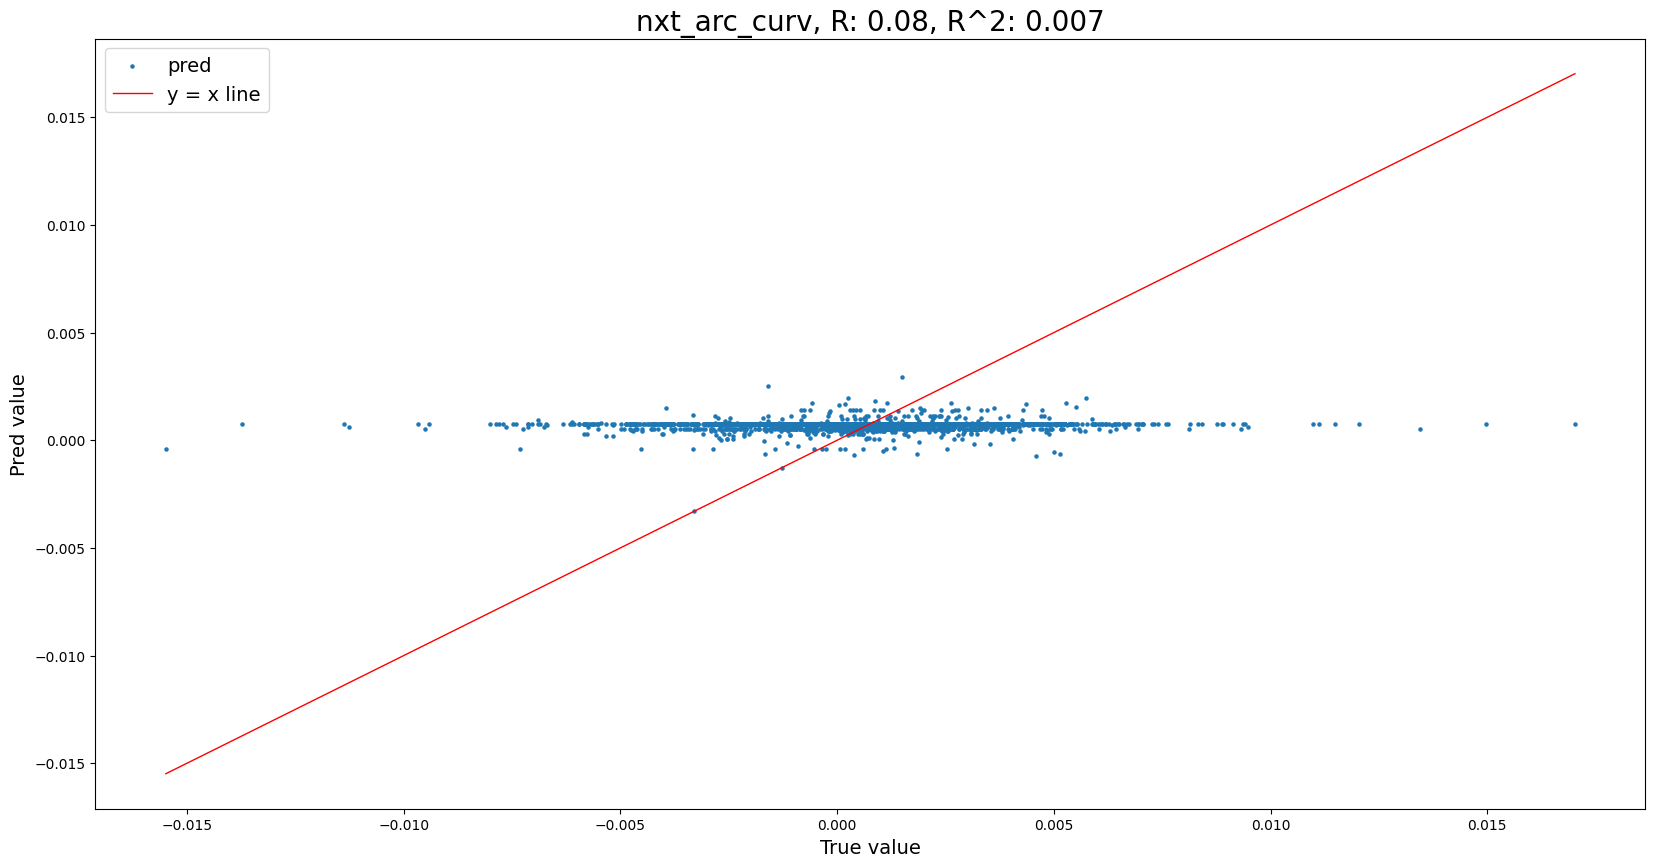

In [57]:
# conduct linear regression on X and y
max_plot_number = 3
count = 0
plt.rcParams["figure.figsize"] = (20, 10)
bins_to_plot = range(len(pn.y_var))

for i, column in enumerate(pn.y_var.columns):
    if count >= max_plot_number:
        break
    plot_neural_data.plot_regression(pn.y_var, column, pn.x_var, bins_to_plot=None, min_r_squared_to_plot=0.3)
    count += 1
    # if i == 3:
    #     break

# Reduce x and y var

### VIF

In [15]:
vif_df = drop_high_vif_vars.get_vif_df(pn.y_var)
vif_df

,feature,vif
0,nxt_ff_angle,191.10000
4,nxt_opt_arc_dheading,184.10000
3,nxt_opt_arc_curv,30.40000
2,nxt_arc_curv,26.90000
8,cur_ff_distance,14.30000
5,time_rel_to_stop,13.40000
11,cur_opt_arc_dheading,12.10000
10,cur_opt_arc_curv,9.80000
1,nxt_ff_distance,8.80000
14,angle_from_m_before_stop_to_nxt_ff,4.80000


In [16]:
specific_columns = vif_df.iloc[:15].feature.values
specific_columns

array(['nxt_ff_angle', 'nxt_opt_arc_dheading', 'nxt_opt_arc_curv',
       'nxt_arc_curv', 'cur_ff_distance', 'time_rel_to_stop',
       'cur_opt_arc_dheading', 'cur_opt_arc_curv', 'nxt_ff_distance',
       'angle_from_m_before_stop_to_nxt_ff', 'traj_curv', 'cur_ff_angle',
       'angle_from_cur_ff_landing_to_nxt_ff', 'bin', 'cur_arc_curv'],
      dtype=object)

### Correlations between features

In [22]:
columns_to_drop = ['nxt_opt_arc_dheading',
    'nxt_arc_curv',
  'angle_from_cur_ff_landing_to_nxt_ff',
]
  

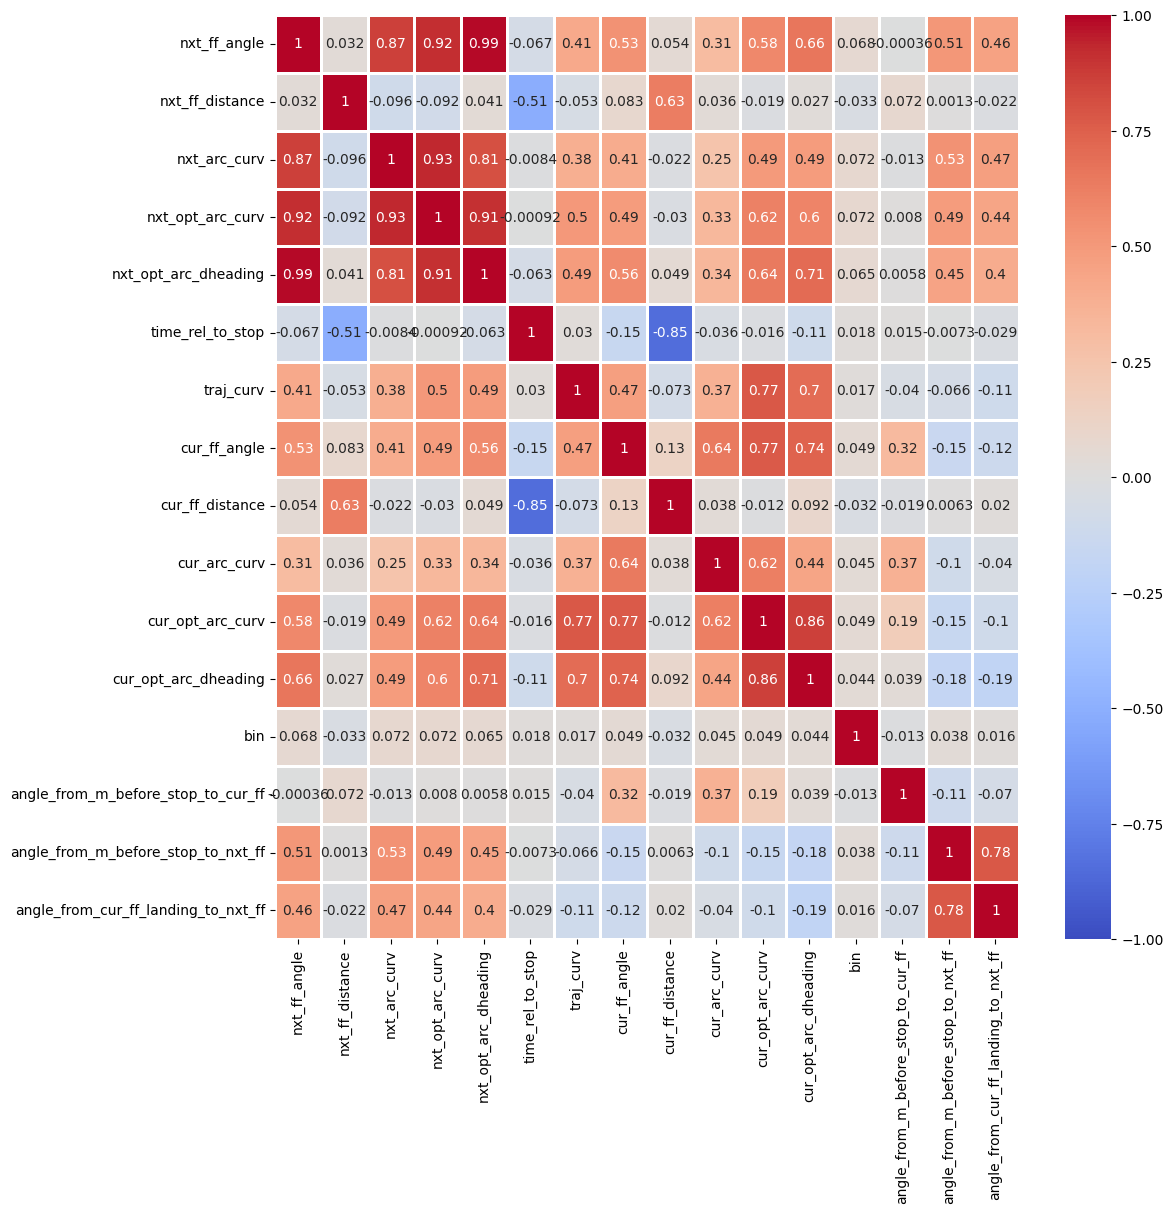

In [23]:
# calculate the correlation coefficient among the columns with VIF > 5
# specific_columns = vif_df[vif_df['vif'] > 5].feature.values
specific_columns = pn.y_var.columns
corr_coeff = pn.y_var[specific_columns].corr()
#plt.figure(figsize = (6, 6))
plt.figure(figsize = (12, 12))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

# CCA

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## No lagging

In [26]:
cca_no_lag = cca_class.CCAclass(X1=pn.x_var, X2=pn.y_var, lagging_included=False)

Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.15776 0.13156 0.12135 0.10787 0.1014  0.08669 0.07405 0.06533 0.06167
 0.04835]
% Shared Variance: [0.02489 0.01731 0.01473 0.01164 0.01028 0.00752 0.00548 0.00427 0.0038
 0.00234]


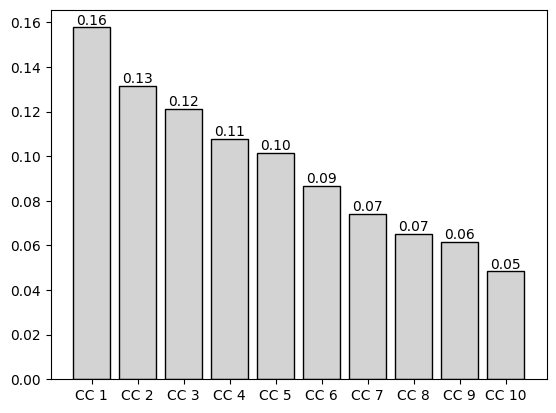

In [27]:
cca_no_lag.conduct_cca()
cca_inst = cca_no_lag

## loadings

### neurons

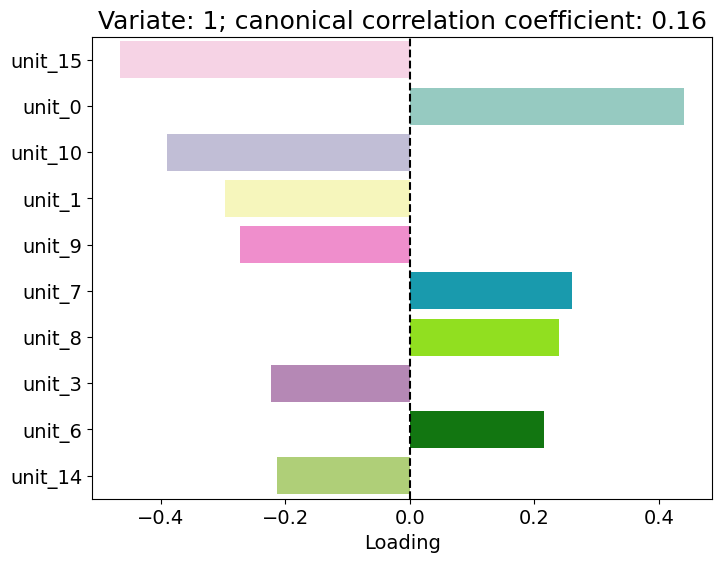

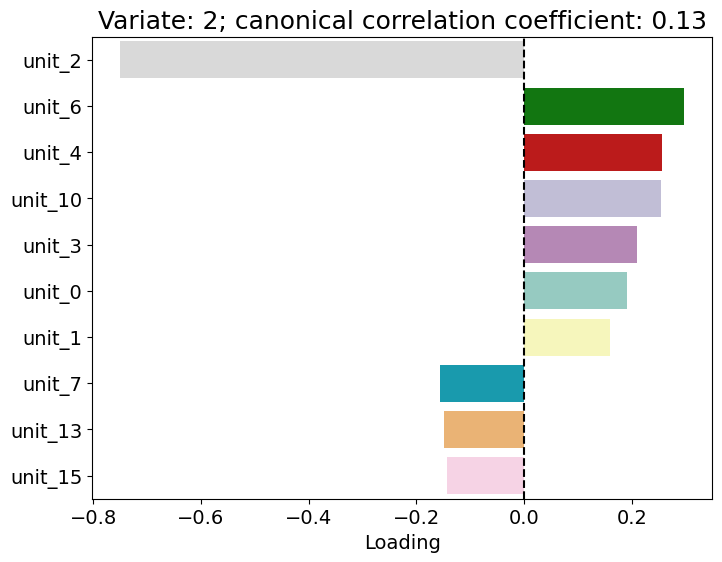

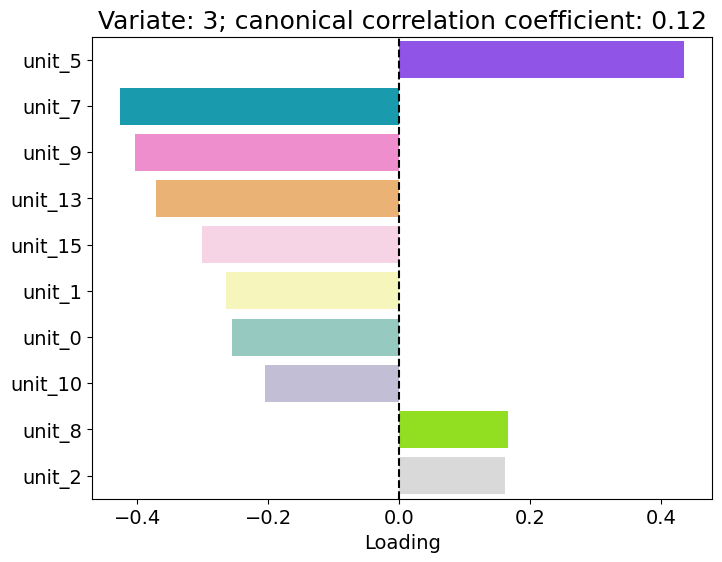

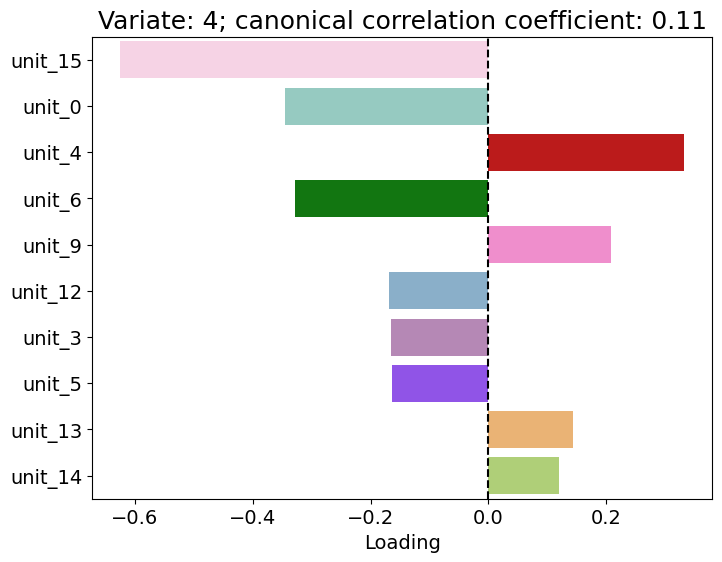

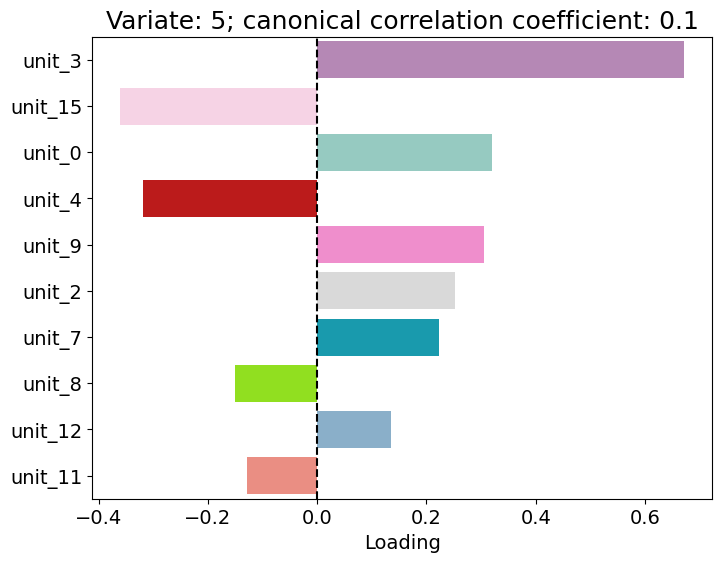

In [28]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1', squared=False)

### behavior

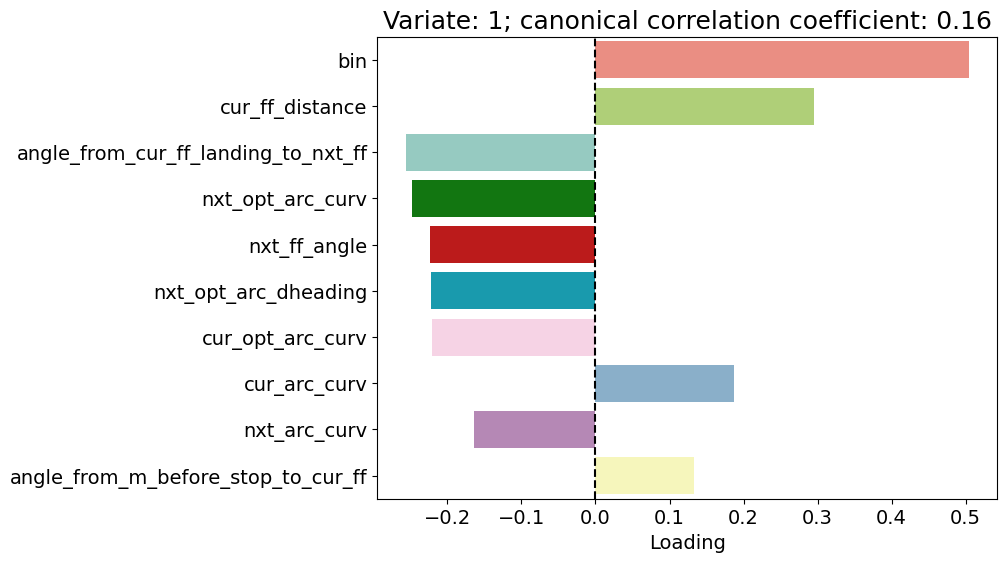

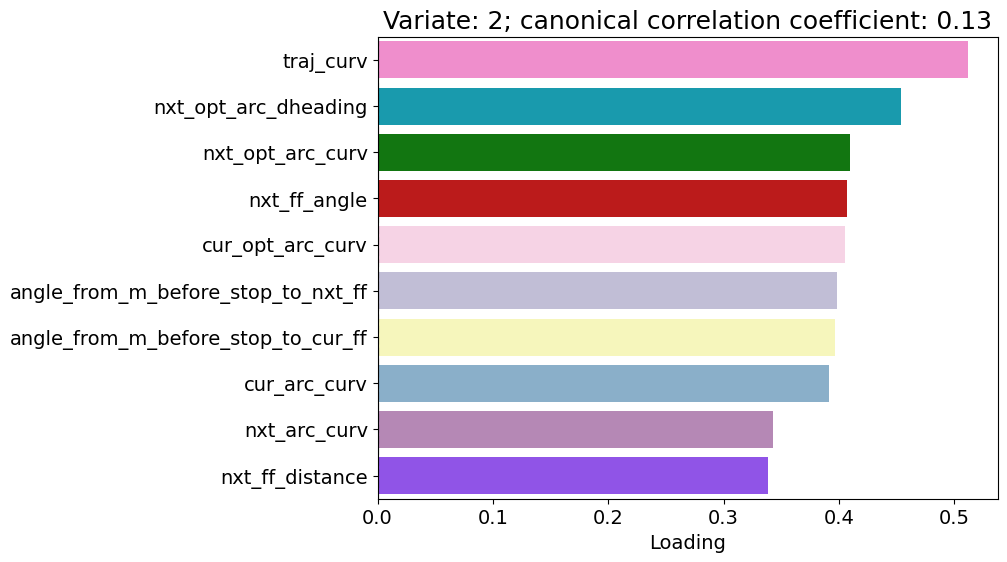

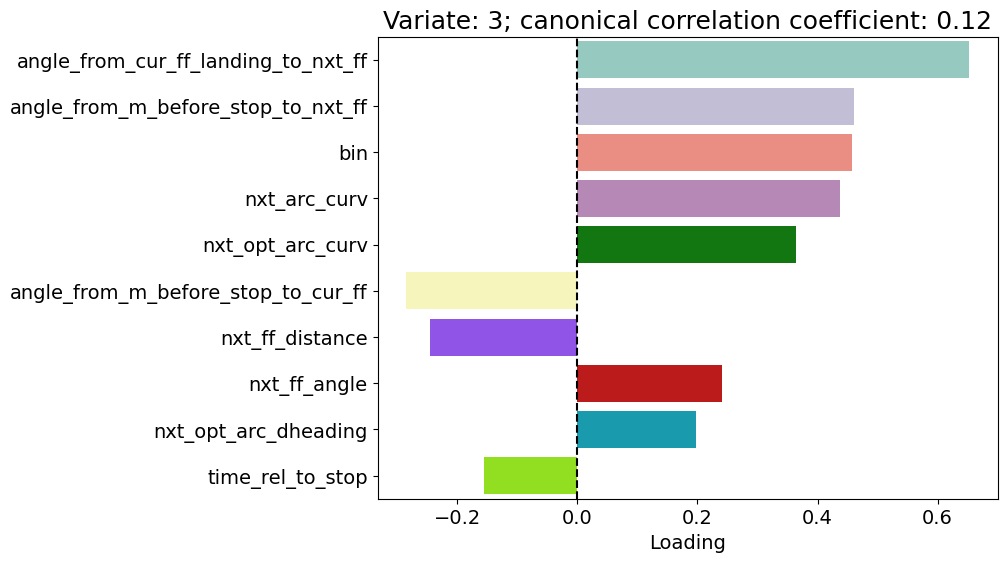

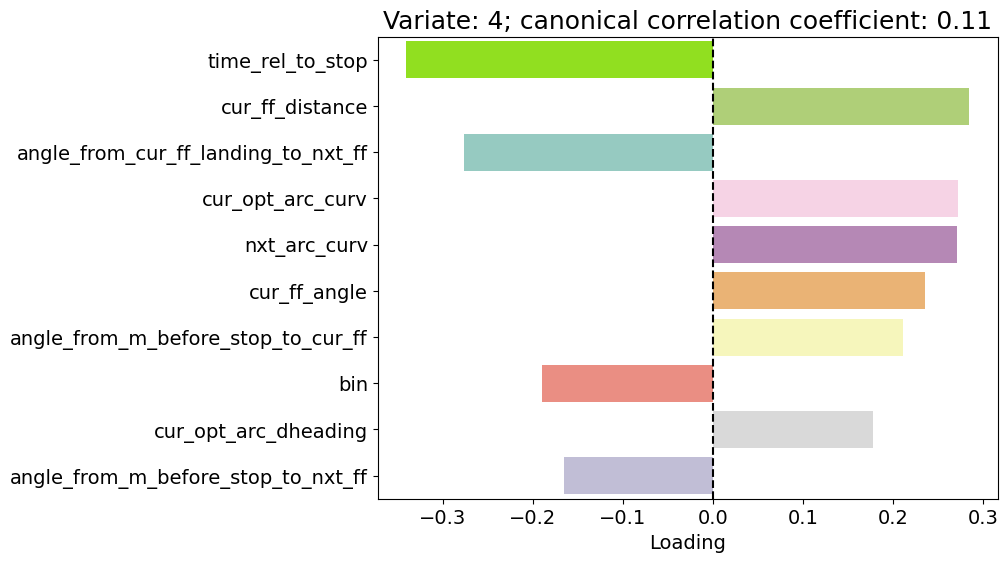

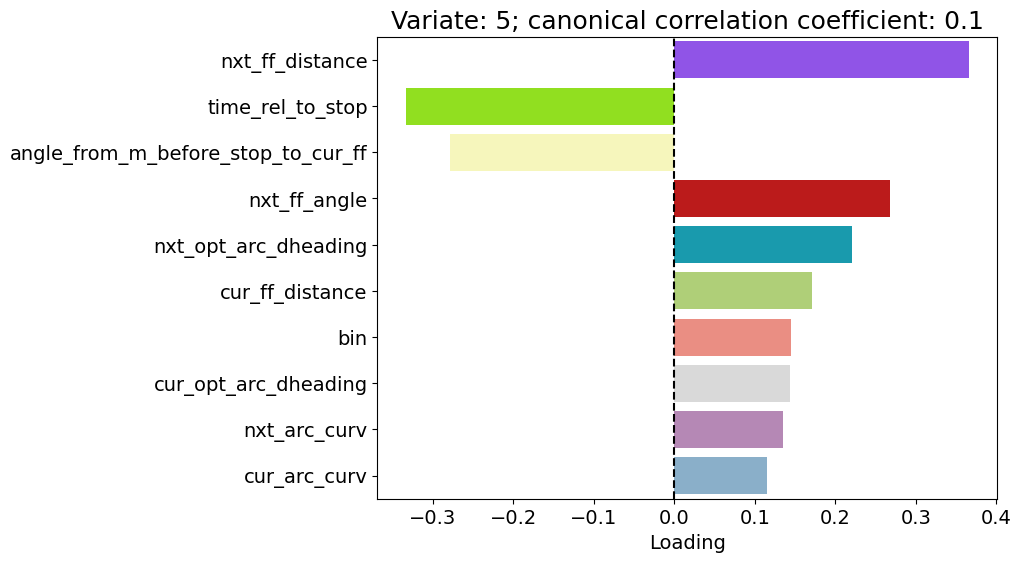

In [29]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2', squared=False)

## squared loadings

### neurons

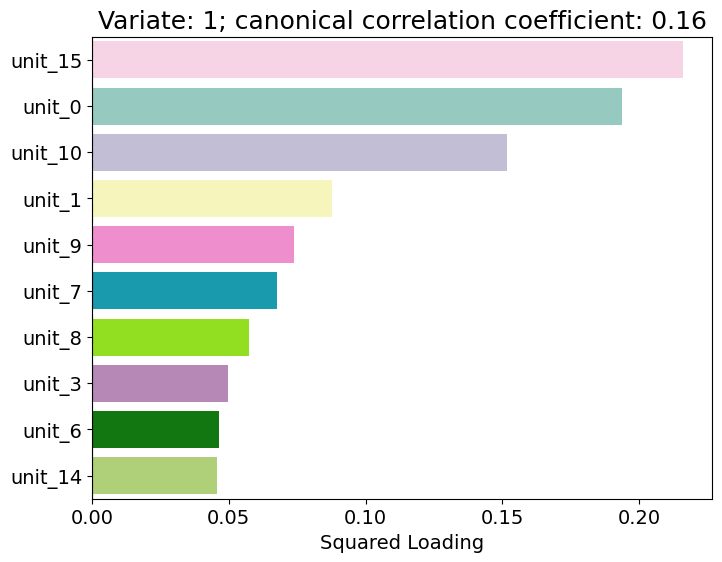

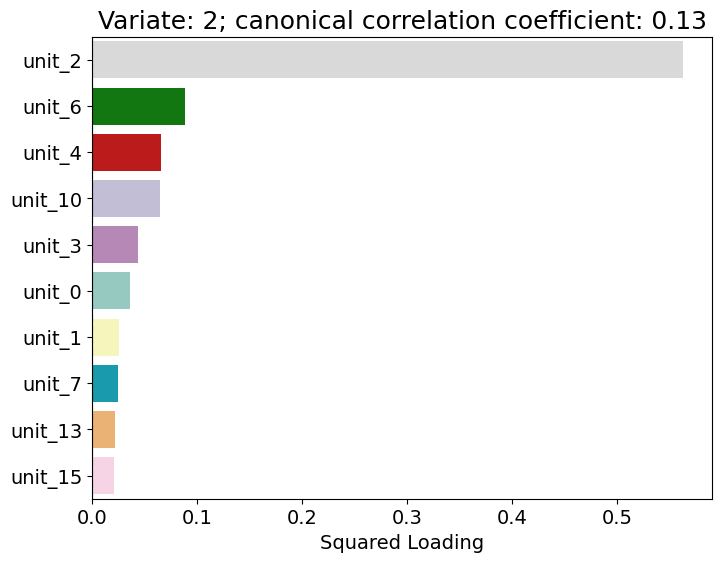

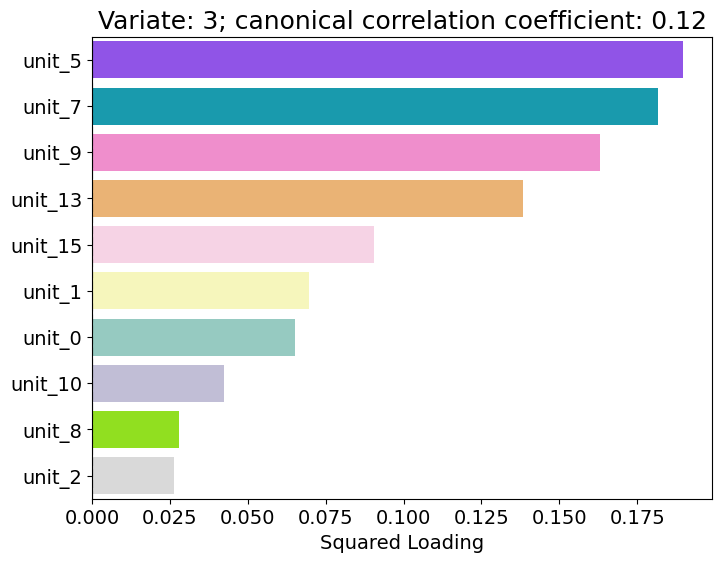

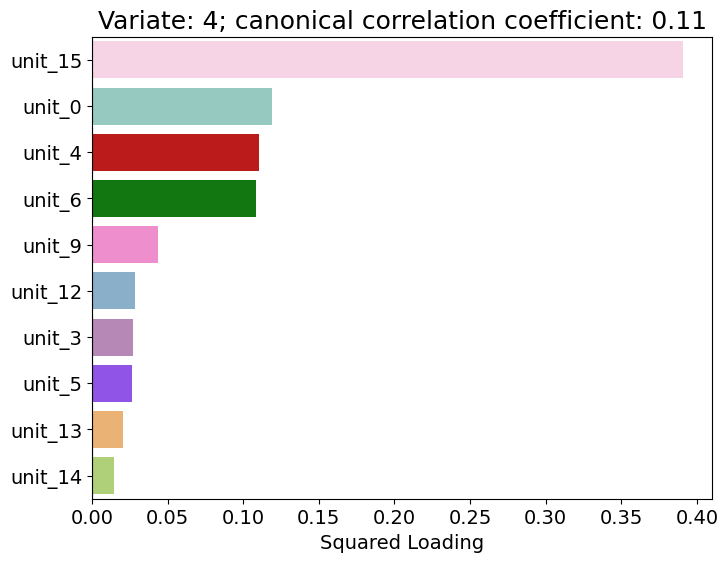

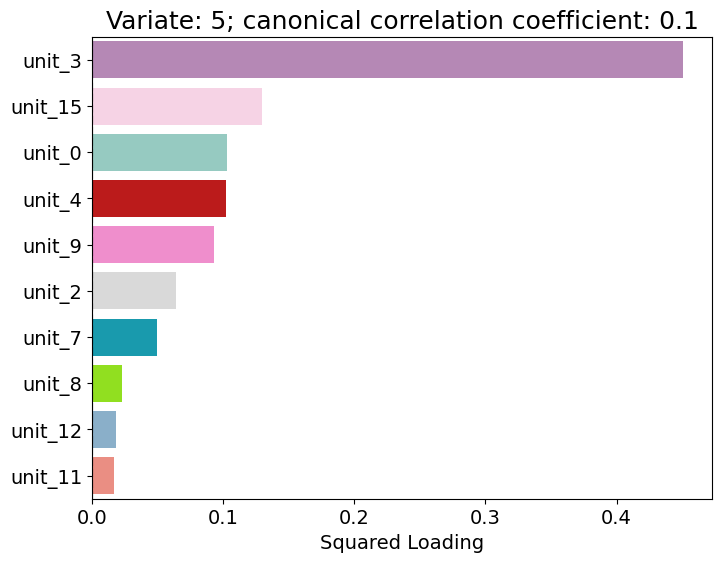

In [30]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1')

### behavior

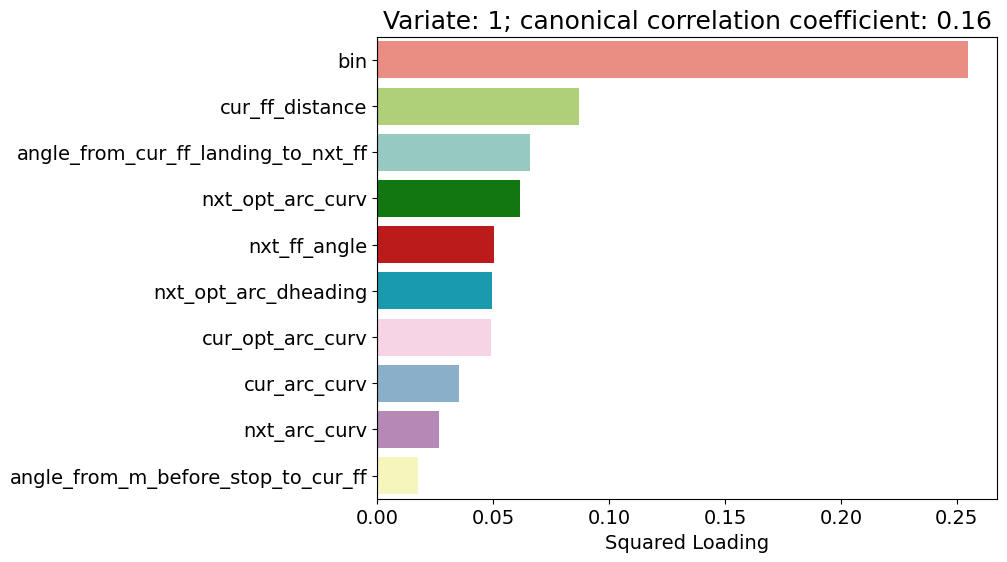

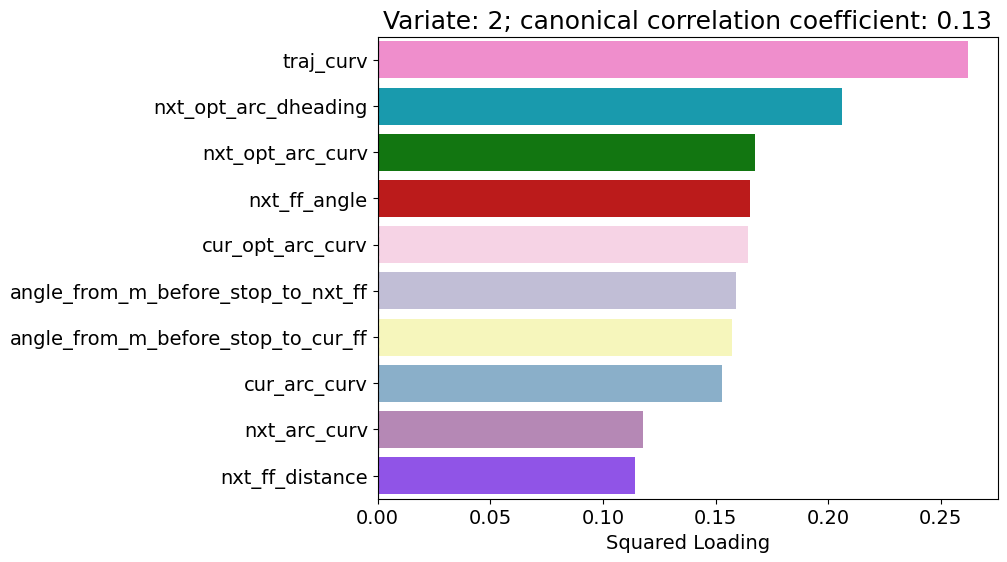

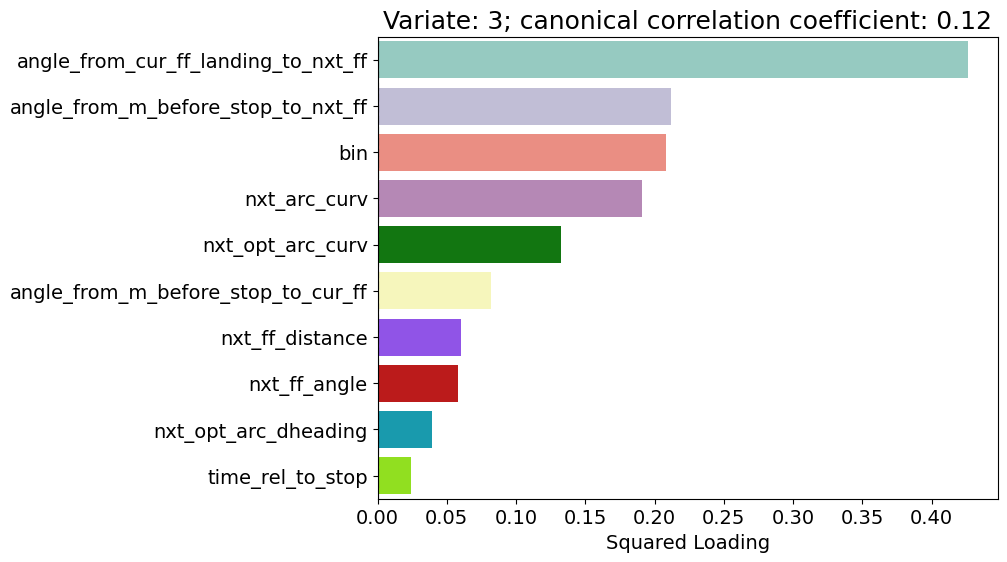

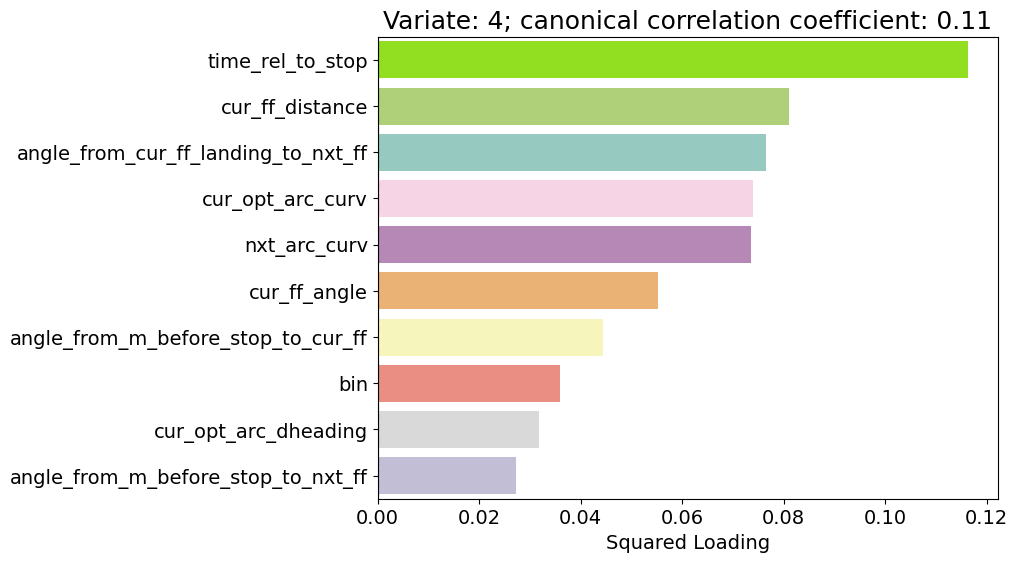

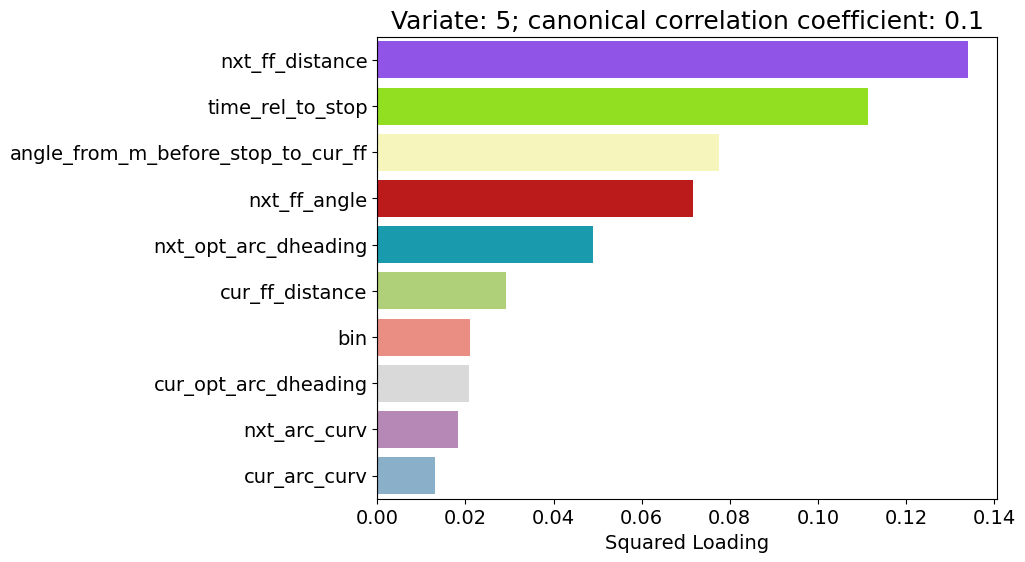

In [31]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2')

## abs weights ranked

### neurons

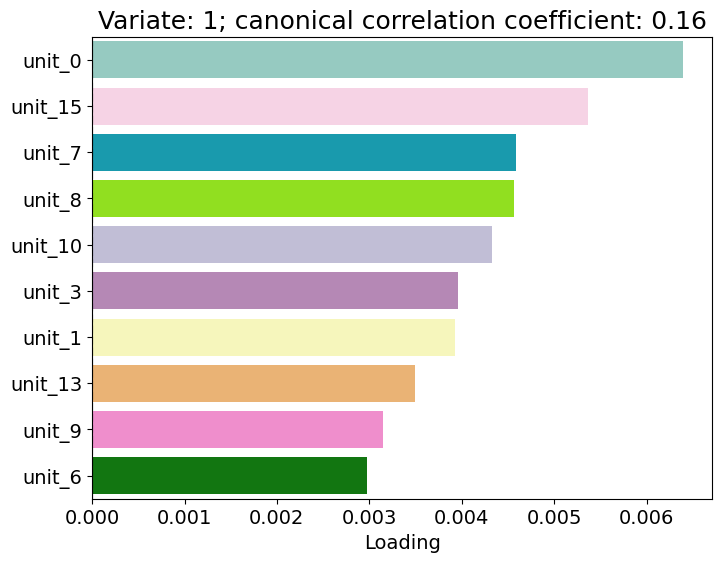

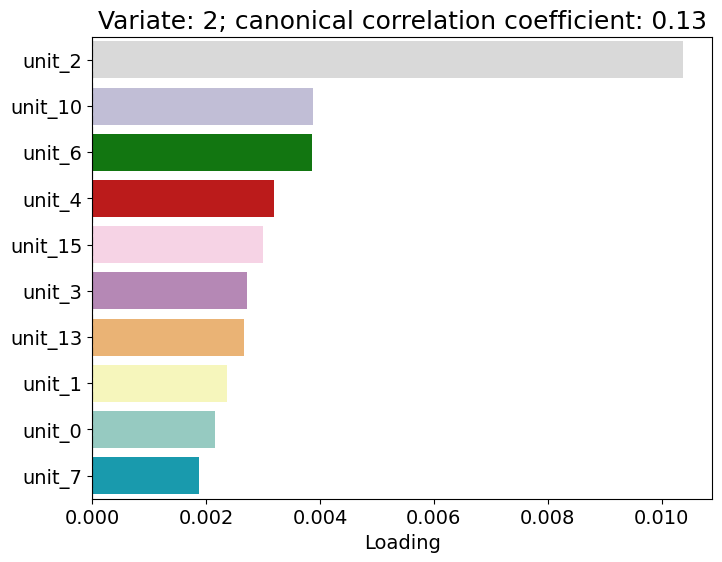

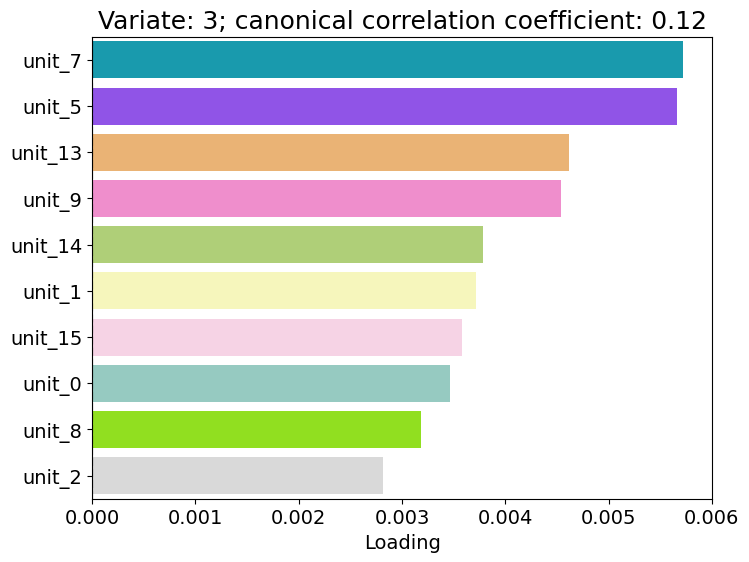

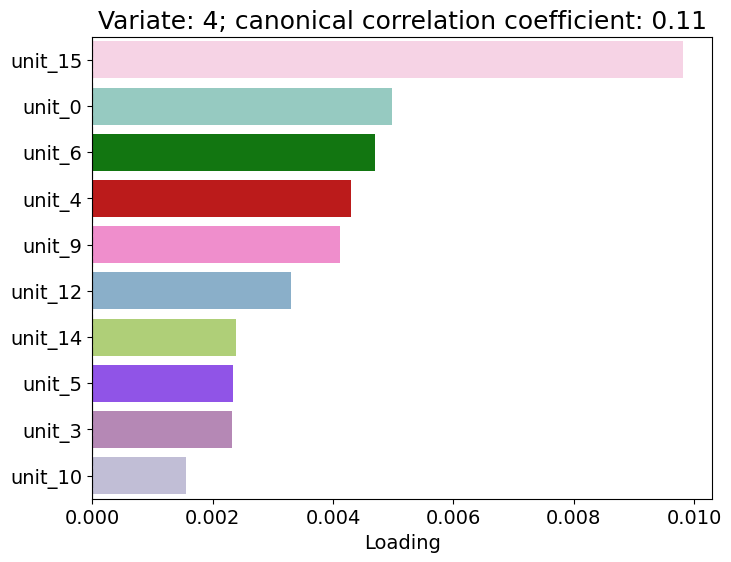

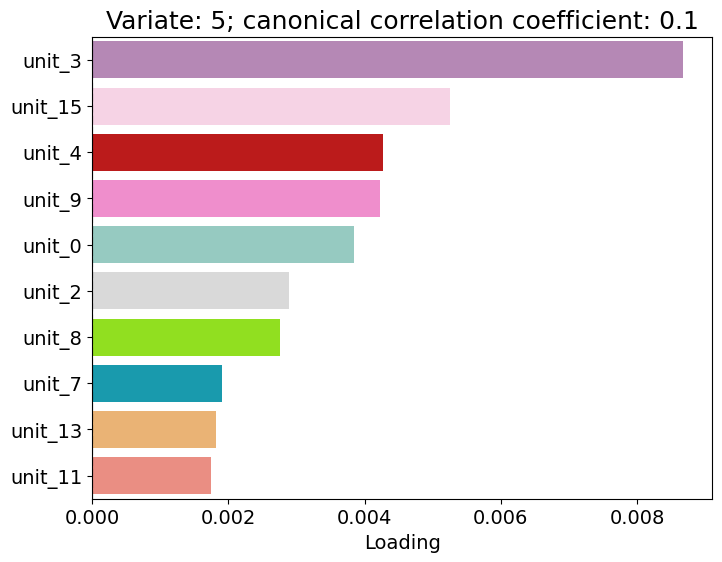

In [32]:
cca_inst.plot_ranked_weights()

### behavior

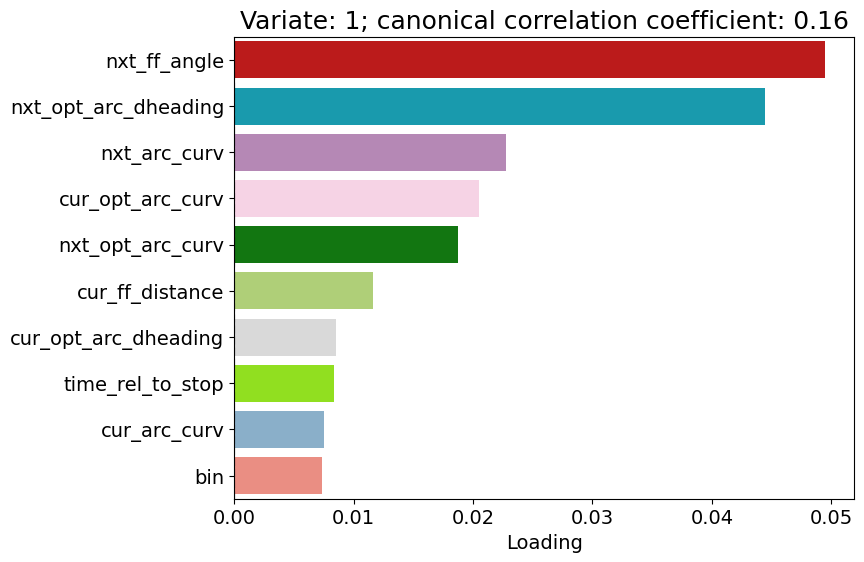

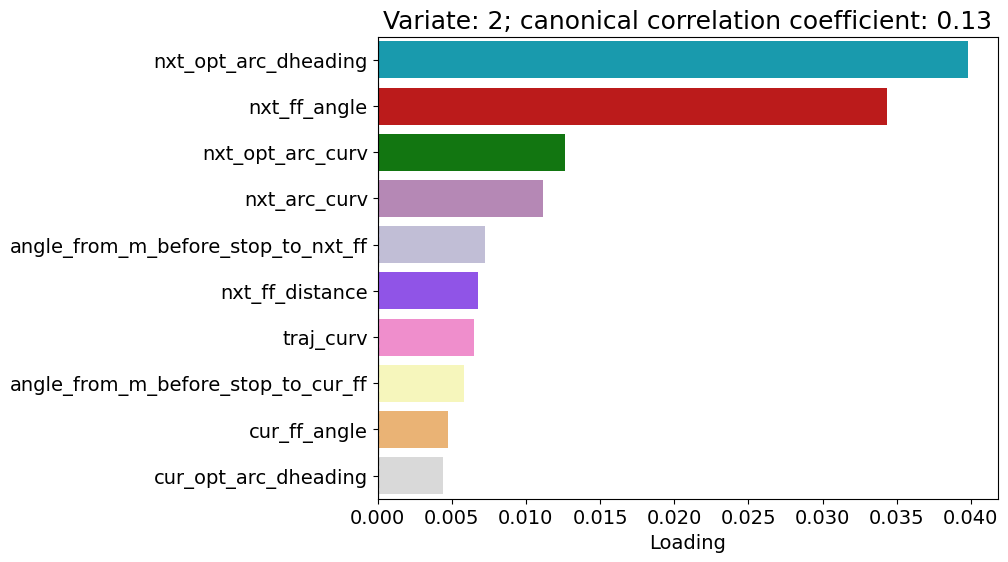

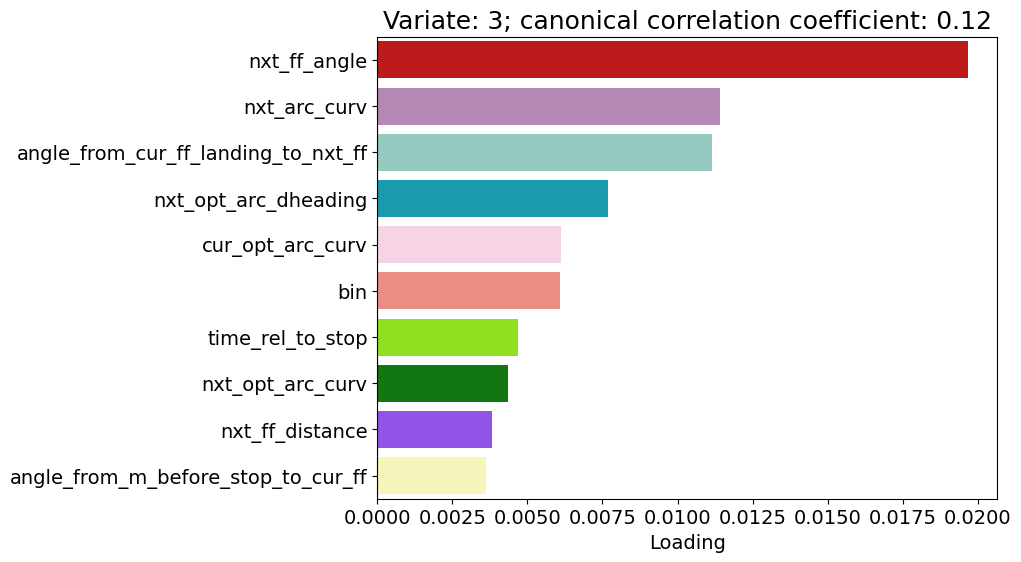

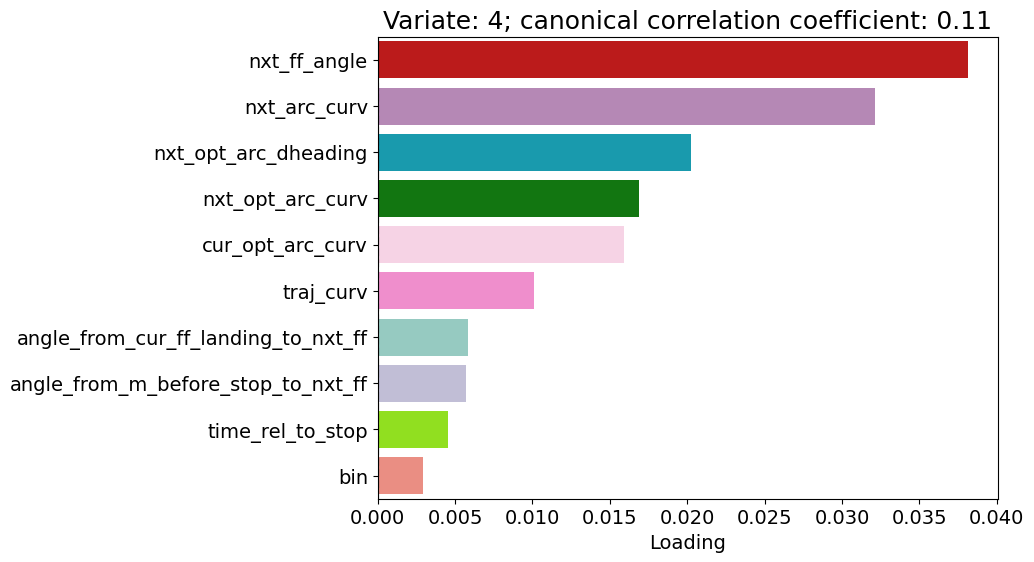

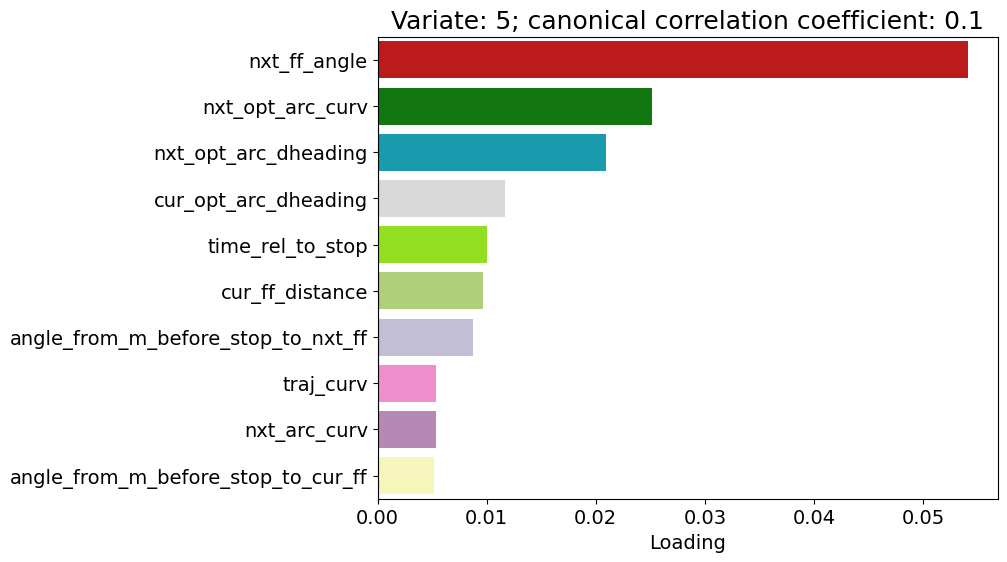

In [33]:
cca_inst.plot_ranked_weights(X1_or_X2='X2')

## plot real weights

### neurons

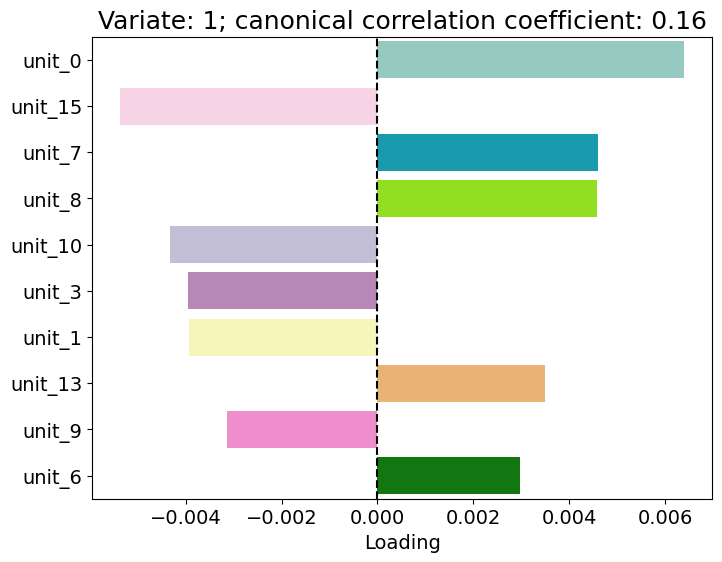

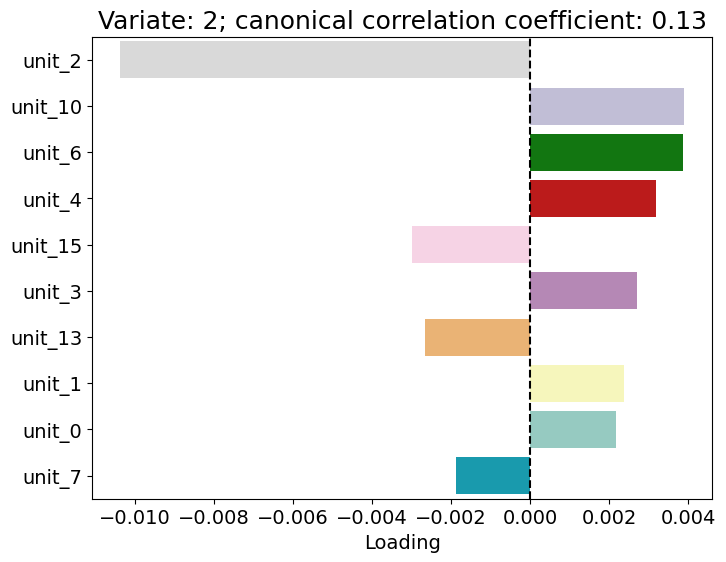

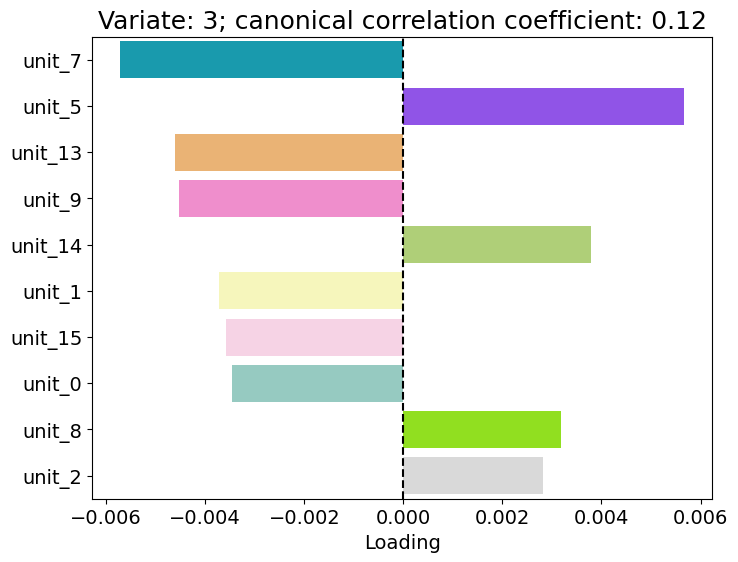

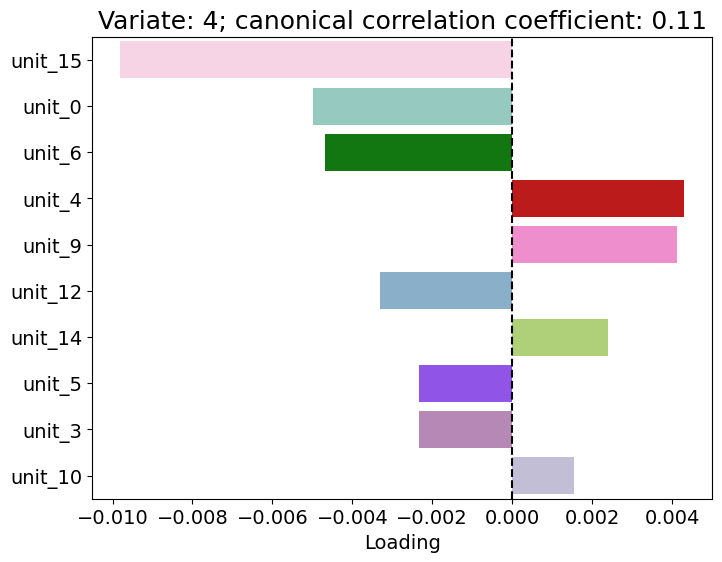

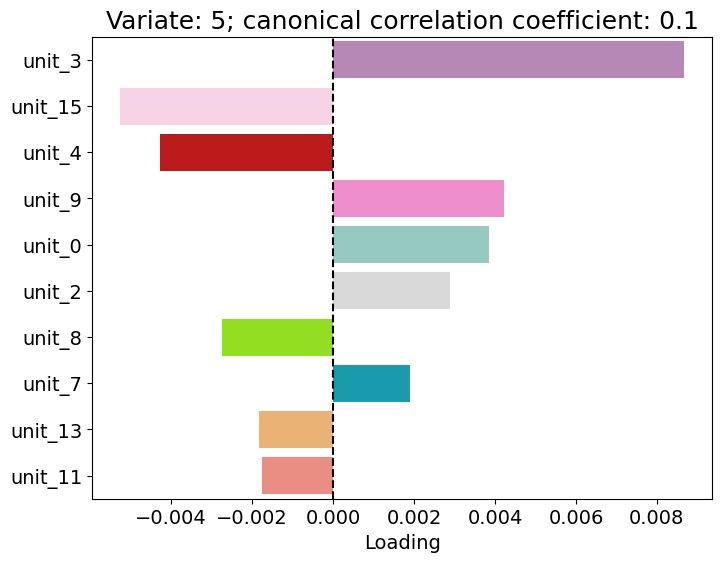

In [34]:
cca_inst.plot_ranked_weights(abs_value=False)

### behavior

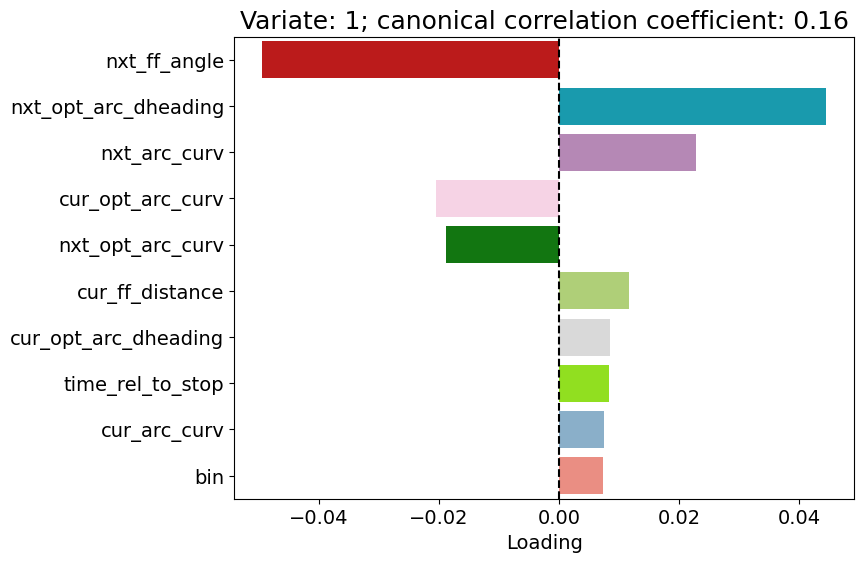

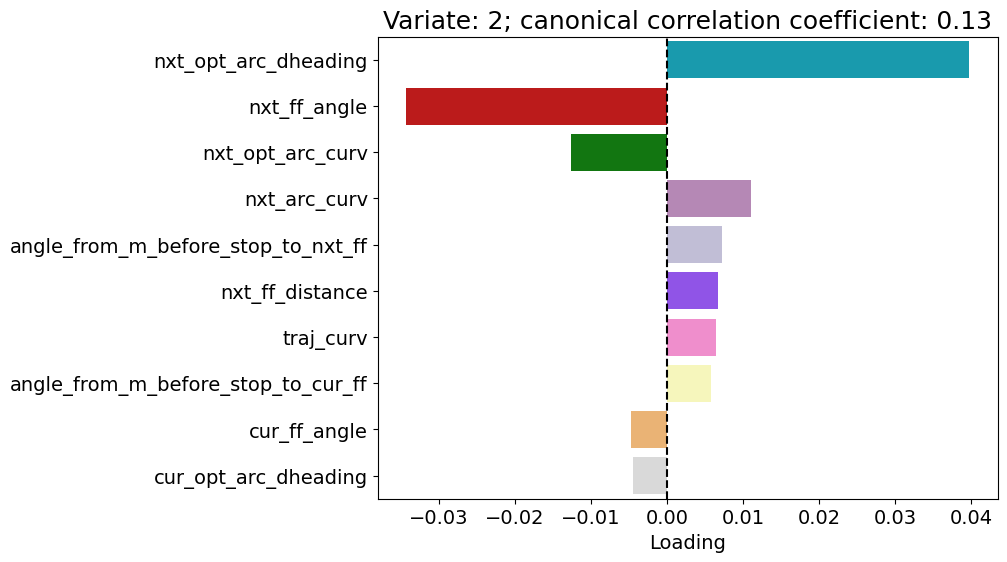

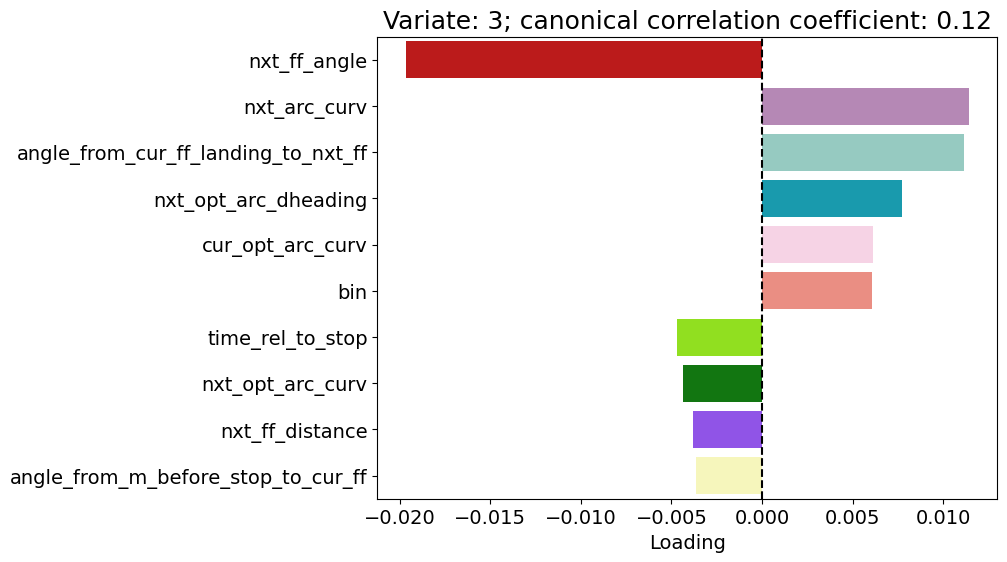

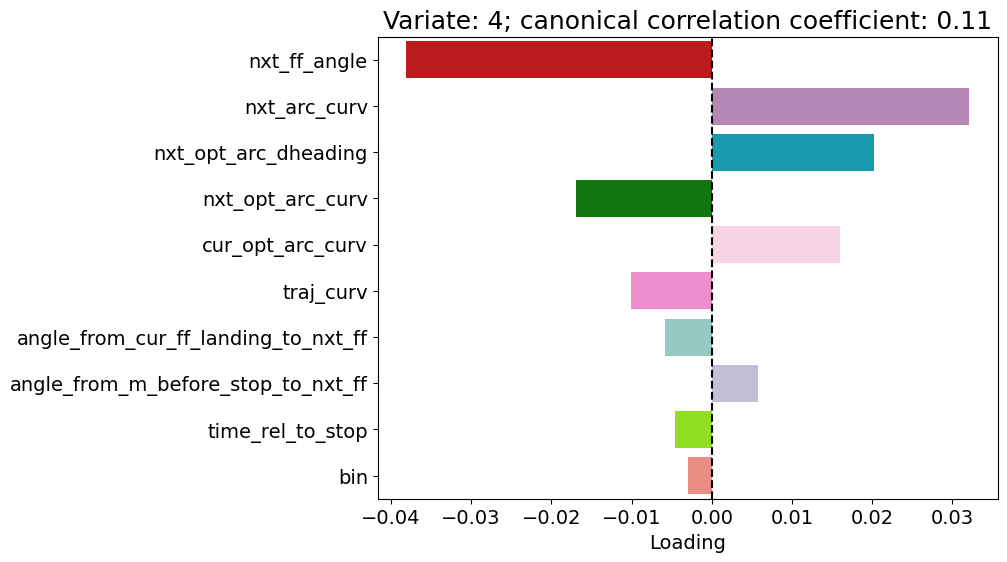

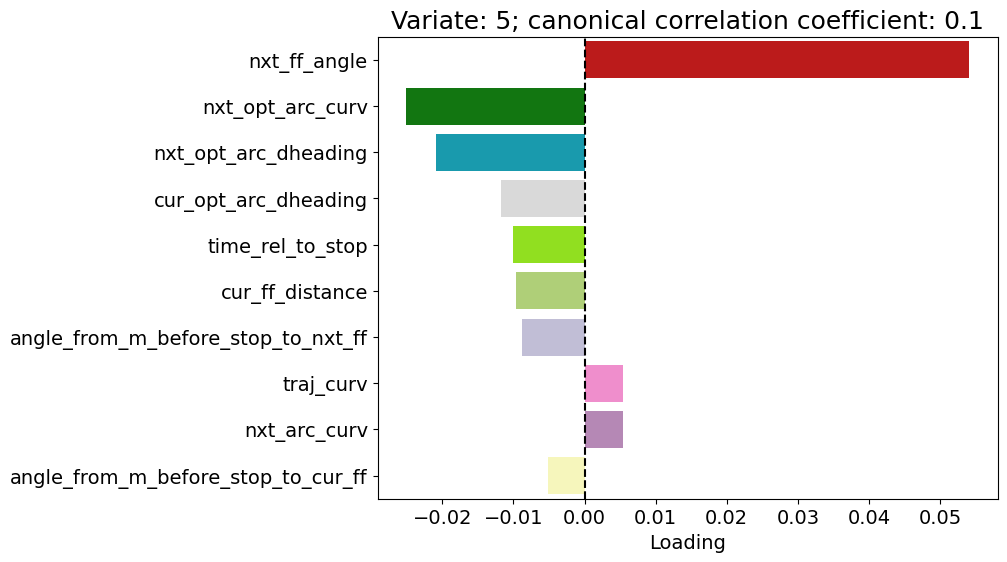

In [35]:
cca_inst.plot_ranked_weights(X1_or_X2='X2', abs_value=False)

In [36]:
stop here!

SyntaxError: invalid syntax (2745754519.py, line 1)

## distribution of each feature

In [37]:
cca_inst.X2_sc.shape

(2605, 16)

In [38]:
X2_sc_df = pd.DataFrame(cca_inst.X2_sc, columns = cca_inst.X2.columns)
X2_sc_df.describe()

,nxt_ff_angle,nxt_ff_distance,nxt_arc_curv,nxt_opt_arc_curv,nxt_opt_arc_dheading,time_rel_to_stop,traj_curv,cur_ff_angle,cur_ff_distance,cur_arc_curv,cur_opt_arc_curv,cur_opt_arc_dheading,bin,angle_from_m_before_stop_to_cur_ff,angle_from_m_before_stop_to_nxt_ff,angle_from_cur_ff_landing_to_nxt_ff
count,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000,2605.00000
mean,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
std,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019,1.00019
min,-2.67585,-2.28834,-6.10556,-4.22594,-2.78234,-1.62454,-10.94198,-2.72845,-1.50967,-6.62896,-5.20379,-3.91468,-1.59786,-1.67847,-3.81106,-2.94898
25%,-0.62876,-0.69437,-0.55737,-0.56286,-0.58293,-0.83658,-0.41894,-0.59077,-0.89447,-0.28443,-0.32890,-0.25508,-0.84200,-0.84557,-0.63547,-0.71137
50%,0.06199,-0.05299,0.03438,0.06760,0.06313,-0.05426,0.16574,0.02878,-0.05531,0.07367,-0.14119,-0.12380,-0.11438,-0.07599,0.03265,0.06776
75%,0.73085,0.68001,0.60198,0.68788,0.68871,0.78387,0.56617,0.64390,0.75220,0.38774,0.60234,0.46314,0.86835,0.63035,0.70673,0.72536
max,2.10430,3.01047,6.15829,3.63185,2.17686,2.99100,3.34161,2.74261,3.23340,7.61719,4.60013,3.69864,1.76589,2.04916,3.23906,2.70786


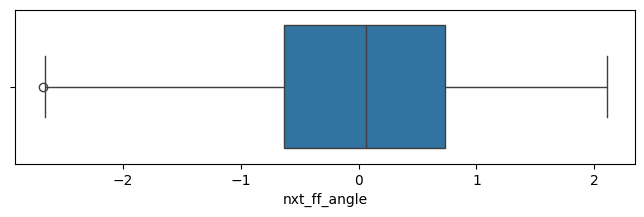

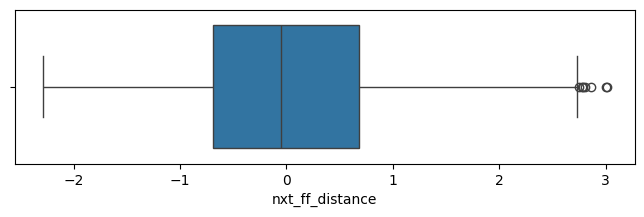

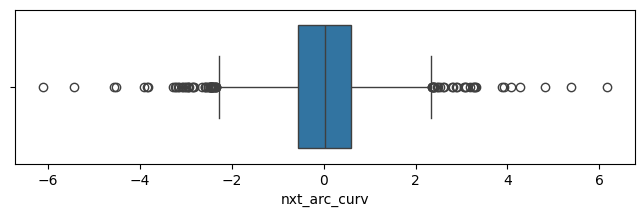

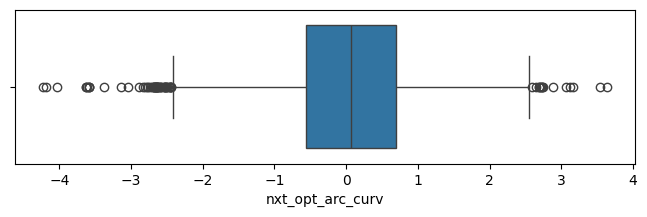

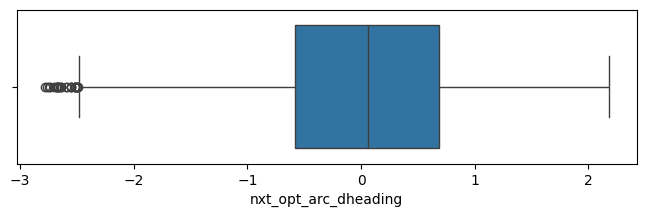

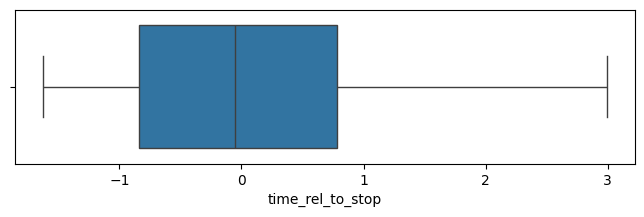

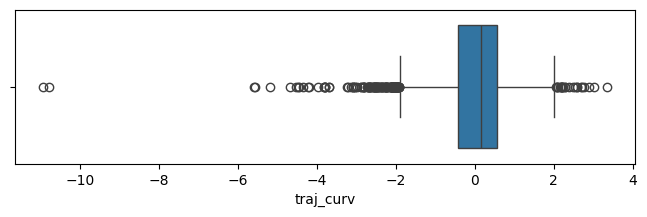

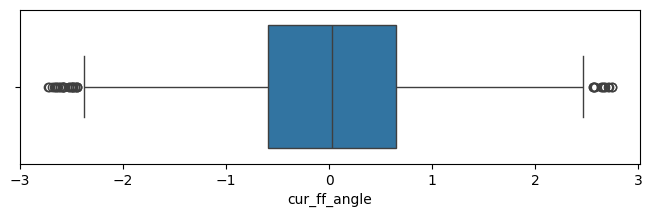

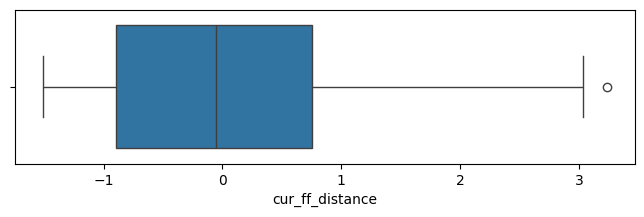

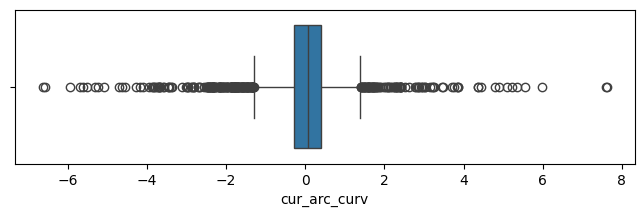

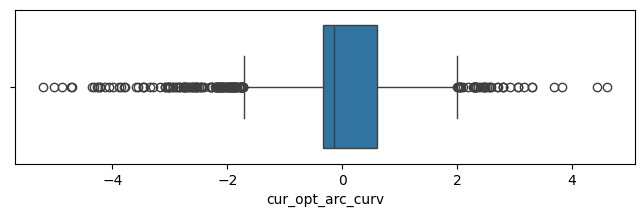

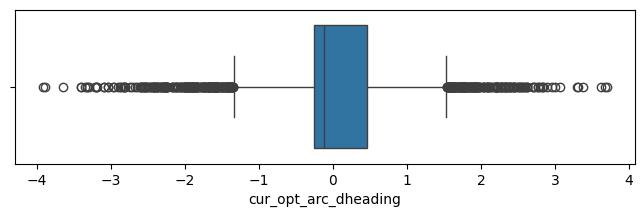

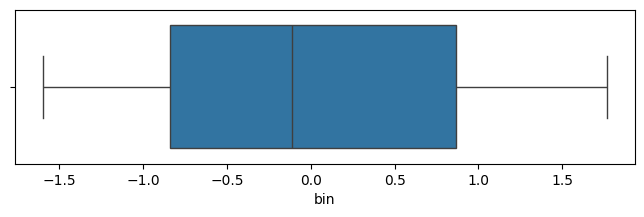

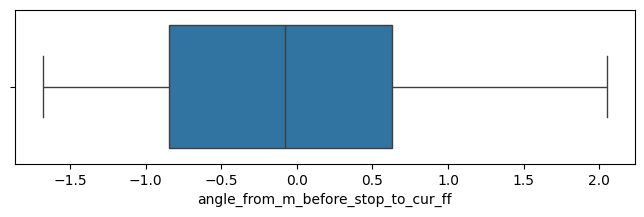

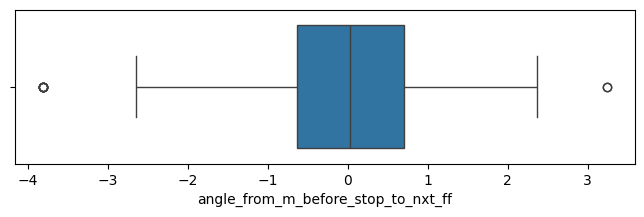

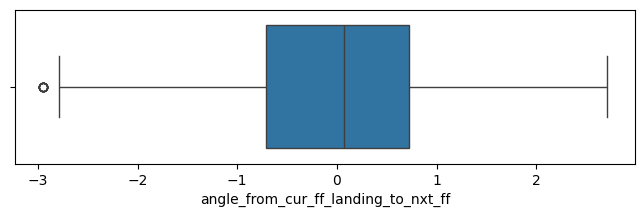

In [39]:
for column in X2_sc_df.columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(X2_sc_df[column], orient='h')
    plt.show()
    

## heatmap of weights
raw canonical coefficients are interpreted in a manner analogous to interpreting regression coefficients. For example: a one unit increase in reading leads to a .0446 decrease in the first canonical variate of set 2 when all of the other variables are held constant (in some other data)

In [40]:
weight_df = cca_inst.X2_weight_df.copy()
weight_df = weight_df.set_index('feature').drop(columns='feature_category')

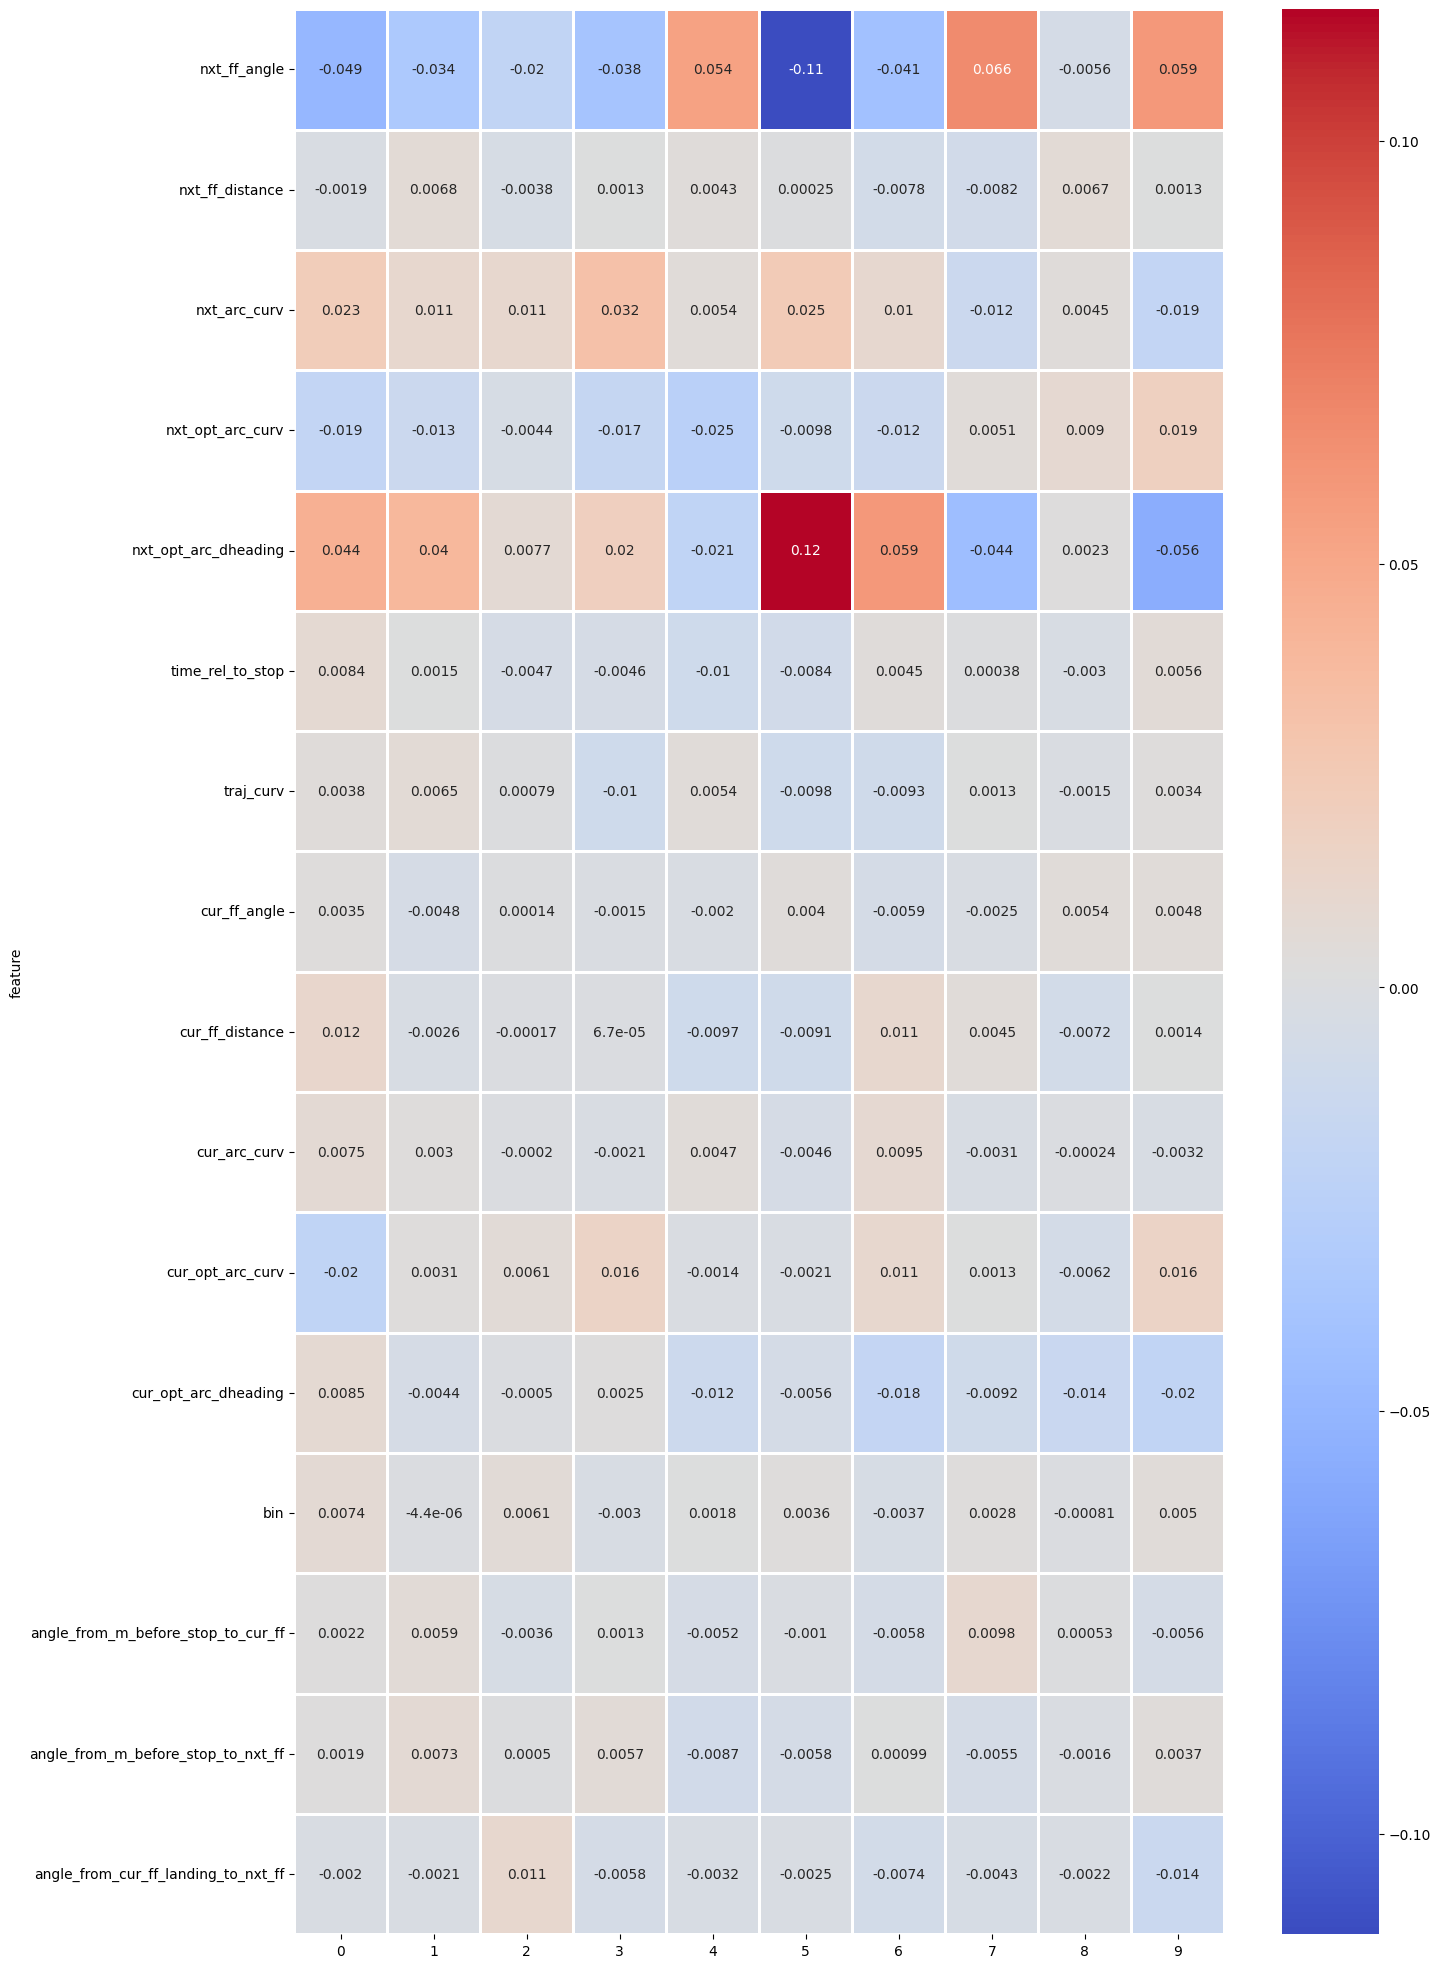

In [41]:
plt.subplots(figsize=(15, 25))
sns.heatmap(weight_df.iloc[:20, :10], cmap='coolwarm', annot=True, linewidths=1)
plt.show()

## train test split

In [42]:
train1, test1, train2, test2 = train_test_split(cca_inst.X1_sc, cca_inst.X2_sc, test_size=0.3, random_state=42)
# use training and testing set
nComponents = 10
cca2 = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents)
cca2.train([train1, train2])
testcorrs = cca2.validate([test1, test2])
testcorrs

Training CCA, kernel = None, regularization = 0.0000, 10 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[array([ 0.04058, -0.02444,  0.07578,  0.03566, -0.00406,  0.01997,
         0.02607, -0.01843,  0.01927,  0.00328, -0.0277 ,  0.0167 ,
        -0.07822,  0.     , -0.04039,  0.02573]),
 array([-0.0521 ,  0.01652,  0.02442,  0.03202,  0.00737,  0.00162,
         0.07581, -0.0145 ,  0.01104,  0.01861,  0.02531, -0.0654 ,
         0.0328 ,  0.02524,  0.00485,  0.00589])]

## compute explained variance

In [43]:
cca2.compute_ev([test1, test2])

Computing explained variance for component #1
Computing explained variance for component #2
Computing explained variance for component #3
Computing explained variance for component #4
Computing explained variance for component #5
Computing explained variance for component #6
Computing explained variance for component #7
Computing explained variance for component #8
Computing explained variance for component #9
Computing explained variance for component #10


[array([[1.34792e-01, 1.14992e-01, 1.27382e-01, 8.22623e-02, 8.08339e-03,
         2.28305e-01, 2.12315e-01, 2.21574e-02, 2.25958e-01, 3.56799e-02,
         5.59284e-03, 8.85458e-02, 1.68928e-01, 3.07434e+30, 1.37107e-01,
         1.98069e-03],
        [2.35135e-01, 2.14845e-01, 6.61350e-02, 1.16607e-01, 4.69405e-02,
         4.39753e-01, 4.70625e-01, 1.58859e-02, 3.05376e-01, 1.71040e-01,
         1.41357e-01, 1.25650e-01, 1.78402e-01, 3.67070e+30, 2.69219e-01,
         1.84295e-01],
        [7.46456e-02, 1.19434e-01, 2.61156e-02, 4.20723e-02, 3.62799e-02,
         2.43793e-01, 2.99861e-01, 1.04187e-01, 1.79899e-01, 1.82237e-01,
         1.24102e-01, 1.18890e-01, 1.04262e-01, 3.01759e+30, 2.90304e-01,
         7.11515e-02],
        [5.45004e-02, 8.54322e-03, 5.97241e-02, 7.30305e-02, 5.15557e-02,
         2.69321e-01, 3.04587e-01, 1.96422e-01, 2.82463e-01, 4.03941e-02,
         9.63822e-02, 1.06367e-01, 2.48017e-01, 2.79097e+30, 1.99478e-01,
         4.06302e-02],
        [7.05601e-02

## test for p values

In [44]:
stats_cca = CanCorr(cca_inst.X1_sc, cca_inst.X2_sc)
print(stats_cca.corr_test().summary())
neural_data_modeling.print_weights('X', stats_cca.x_cancoef)
neural_data_modeling.print_weights('Z', stats_cca.y_cancoef)

                             Cancorr results
   Canonical Correlation Wilks' lambda  Num DF    Den DF   F Value Pr > F
-------------------------------------------------------------------------
0                 0.1578        0.8993 256.0000 29290.3190  1.0727 0.2037
1                 0.1316        0.9223 225.0000 27485.7440  0.9300 0.7663
2                 0.1214        0.9385 196.0000 25681.5411  0.8368 0.9528
3                 0.1079        0.9526 169.0000 23878.0293  0.7433 0.9947
4                 0.1014        0.9638 144.0000 22075.6346  0.6621 0.9994
5                 0.0867        0.9738 121.0000 20274.9402  0.5671 1.0000
6                 0.0740        0.9812 100.0000 18476.7661  0.4912 1.0000
7                 0.0653        0.9866  81.0000 16682.3038  0.4310 1.0000
8                 0.0617        0.9908  64.0000 14893.3565  0.3728 1.0000
9                 0.0484        0.9946  49.0000 13112.7953  0.2859 1.0000
10                0.0378        0.9969  36.0000 11345.5083  0.2212 

# PGAM (unfinished)

In [45]:
## Categorize variables
pn.y_var.columns
temporal_vars = ['time_rel_to_stop',
 'time_when_nxt_ff_first_seen_rel_to_stop',
 'time_when_cur_ff_first_seen_rel_to_stop',
 'time_when_nxt_ff_last_seen_rel_to_stop',
 'time_when_cur_ff_last_seen_rel_to_stop',
 ]

spatial_vars = [x for x in pn.y_var.columns if x not in temporal_vars]
spatial_vars

['nxt_ff_angle',
 'nxt_ff_distance',
 'nxt_arc_curv',
 'nxt_opt_arc_curv',
 'nxt_opt_arc_dheading',
 'traj_curv',
 'cur_ff_angle',
 'cur_ff_distance',
 'cur_arc_curv',
 'cur_opt_arc_curv',
 'cur_opt_arc_dheading',
 'bin',
 'angle_from_m_before_stop_to_cur_ff',
 'angle_from_m_before_stop_to_nxt_ff',
 'angle_from_cur_ff_landing_to_nxt_ff']